**Table of contents**<a id='toc0_'></a>    
- 1. [Objectif du Notebook](#toc1_)    
- 2. [Clustering des clients avec K-Means](#toc2_)    
  - 2.1. [Application de K-Means pour la segmentation des clients](#toc2_1_)    
  - 2.2. [Évaluation de la qualité des clusters avec le Silhouette Score](#toc2_2_)    
- 3. [Stabilité à l'Initialisation du K-Means](#toc3_)    
  - 3.1. [Choix du nombre de clusters : 4](#toc3_1_)    
  - 3.2. [Visualisation et interprétation des résultats](#toc3_2_)    
  - 3.3. [Interprétation des clusters avec les données non normalisées](#toc3_3_)    
    - 3.3.1. [Cluster 0 : Clients récents et légèrement plus dépensiers (25,874 clients)](#toc3_3_1_)    
    - 3.3.2. [Cluster 1 : Clients inactifs modérés (25,171 clients)](#toc3_3_2_)    
    - 3.3.3. [Cluster 2 : Clients inactifs récents (27,811 clients)](#toc3_3_3_)    
    - 3.3.4. [Cluster 3 : Clients les plus inactifs (17,239 clients)](#toc3_3_4_)    
    - 3.3.5. [Conclusion :](#toc3_3_5_)    
  - 3.4. [Visualisation des clusters avec des Radar Plots](#toc3_4_)    
  - 3.5. [Interprétation des Radar Plots des clusters RFM](#toc3_5_)    
    - 3.5.1. [Radar Plot Global (Superposition des clusters) :](#toc3_5_1_)    
    - 3.5.2. [Radar Plots Individuels (Un plot par cluster) :](#toc3_5_2_)    
    - 3.5.3. [Conclusion :](#toc3_5_3_)    
  - 3.6. [Conclusion sur l'efficacité de K-Means](#toc3_6_)    
- 4. [Clustering avec DBSCAN](#toc4_)    
  - 4.1. [Résultats du clustering avec DBSCAN](#toc4_1_)    
    - 4.1.1. [Observations :](#toc4_1_1_)    
    - 4.1.2. [Ajustements à venir :](#toc4_1_2_)    
  - 4.2. [Observations sur DBSCAN et conclusion](#toc4_2_)    
    - 4.2.1. [Observations :](#toc4_2_1_)    
    - 4.2.2. [Conclusion :](#toc4_2_2_)    
- 5. [AgglomerativeClustering](#toc5_)    
  - 5.1. [Tentative avec Agglomerative Clustering](#toc5_1_)    
  - 5.2. [Détermination du nombre optimal de clusters à partir du dendrogramme](#toc5_2_)    
  - 5.3. [Conclusion sur Agglomerative Clustering](#toc5_3_)    
- 6. [Conclusion générale sur le choix de la méthode de clustering](#toc6_)    
- 7. [K-Means avec RFM et avg_review_score](#toc7_)    
  - 7.1. [Pourquoi ajouter le avg_review_score ?](#toc7_1_)    
  - 7.2. [Choix de K = 4 pour le K-Means avec avg_review_score](#toc7_2_)    
  - 7.3. [Analyse des résultats et besoin d'une PCA](#toc7_3_)    
    - 7.3.1. [Observations :](#toc7_3_1_)    
    - 7.3.2. [Conclusion :](#toc7_3_2_)    
  - 7.4. [Observations après la PCA](#toc7_4_)    
    - 7.4.1. [Interprétation des clusters (avec nombre de clients) :](#toc7_4_1_)    
    - 7.4.2. [Conclusion :](#toc7_4_2_)    
  - 7.5. [Visualisation des clusters avec les variables RFM et le score de satisfaction](#toc7_5_)    
  - 7.6. [Analyse des résultats : Clustering avec les variables RFM et Satisfaction](#toc7_6_)    
    - 7.6.1. [Interprétation des Radar Plots](#toc7_6_1_)    
    - 7.6.2. [Interprétation du tableau des moyennes par cluster](#toc7_6_2_)    
    - 7.6.3. [Conclusion](#toc7_6_3_)    
- 8. [Troisième K-Means : RFM + Satisfaction + Méthodes de Paiement](#toc8_)    
  - 8.1. [Choix du nombre de clusters : 4](#toc8_1_)    
  - 8.2. [Interprétation des résultats de K-Means avec méthodes de paiement](#toc8_2_)    
  - 8.3. [Observations après la PCA](#toc8_3_)    
    - 8.3.1. [Répartition des clients par cluster :](#toc8_3_1_)    
    - 8.3.2. [Analyse des composantes principales :](#toc8_3_2_)    
    - 8.3.3. [Conclusion :](#toc8_3_3_)    
  - 8.4. [Analyse des Clusters avec les Méthodes de Paiement](#toc8_4_)    
    - 8.4.1. [Observations principales :](#toc8_4_1_)    
    - 8.4.2. [Conclusion :](#toc8_4_2_)    
- 9. [Conclusion Générale](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Objectif du Notebook](#toc0_)

Ce notebook a pour objectif d'analyser et de segmenter les clients en fonction de plusieurs variables pertinentes pour une entreprise : les données **RFM** (Récence, Fréquence, Montant total dépensé), les **scores de satisfaction** des clients (avg_review_score), ainsi que leurs **méthodes de paiement**. 

L'objectif est de mieux comprendre les comportements des clients à travers des méthodes de **clustering non supervisées** comme le **K-Means**, en s'appuyant également sur des techniques de réduction de dimensions telles que la **PCA** (Analyse en Composantes Principales) pour améliorer la visualisation et l'interprétation des résultats.

Nous allons procéder à une segmentation des clients en plusieurs étapes :
1. Un premier clustering basé uniquement sur les données RFM.
2. Un second clustering en ajoutant les scores de satisfaction pour capturer une dimension de qualité de l'expérience client.
3. Un dernier clustering intégrant également les **méthodes de paiement**, afin de comprendre l'impact de ce facteur dans la segmentation des clients.

À travers ces analyses, nous espérons identifier des sous-groupes de clients distincts en termes de comportement d'achat, de satisfaction et de préférence de paiement. Cette segmentation pourra ensuite être utilisée pour mettre en place des stratégies de **fidélisation**, de **réengagement**, ou pour optimiser l'expérience client.

In [1]:
# Importations des bibliothèques standards
import threading
import time

# Importations des bibliothèques tierces
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# Charger les données
df = pd.read_csv('prepared_customer_data.csv')

# Afficher les premières lignes du dataframe pour vérifier le chargement
df.head()

,customer_unique_id,recency,frequency,total_spent,avg_review_score,product_variety,order_purchase_timestamp,payment_methods_boleto,payment_methods_credit_card,payment_methods_debit_card,payment_methods_not_defined,payment_methods_voucher
0,0000366f3b9a7992bf8c76cfdf3221e2,160.273507,1,141.90,5.0,1,2018-05-10 10:56:27,False,True,False,False,False
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163.263090,1,27.19,4.0,1,2018-05-07 11:11:27,False,True,False,False,False
2,0000f46a3911fa3c0805444483337064,585.850868,1,86.22,3.0,1,2017-03-10 21:05:03,False,True,False,False,False
3,0000f6ccb0745a6a4b88665a16c9f078,369.875428,1,43.62,4.0,1,2017-10-12 20:29:41,False,True,False,False,False
4,0004aac84e0df4da2b147fca70cf8255,336.905972,1,196.89,5.0,1,2017-11-14 19:45:42,False,True,False,False,False


# 2. <a id='toc2_'></a>[Clustering des clients avec K-Means](#toc0_)

## 2.1. <a id='toc2_1_'></a>[Application de K-Means pour la segmentation des clients](#toc0_)

Dans cette partie, nous allons appliquer l'algorithme de **K-Means** pour segmenter les clients selon leurs comportements d'achat, en utilisant les variables RFM : **Récence**, **Fréquence**, et **Montant total dépensé**. 

Pour garantir que chaque variable contribue de manière équivalente à la formation des clusters, nous commençons par **normaliser les données RFM** avec un **MinMaxScaler**. Cela permettra de ramener toutes les valeurs dans la même échelle, évitant que certaines variables dominent le calcul des clusters.

Ensuite, nous utiliserons la **méthode du coude** pour déterminer le nombre optimal de clusters (**K**).

In [3]:
# Normaliser les données RFM avec MinMaxScaler
scaler = MinMaxScaler()
rfm_data_scaled = scaler.fit_transform(
    df[['recency', 'frequency', 'total_spent']]
)

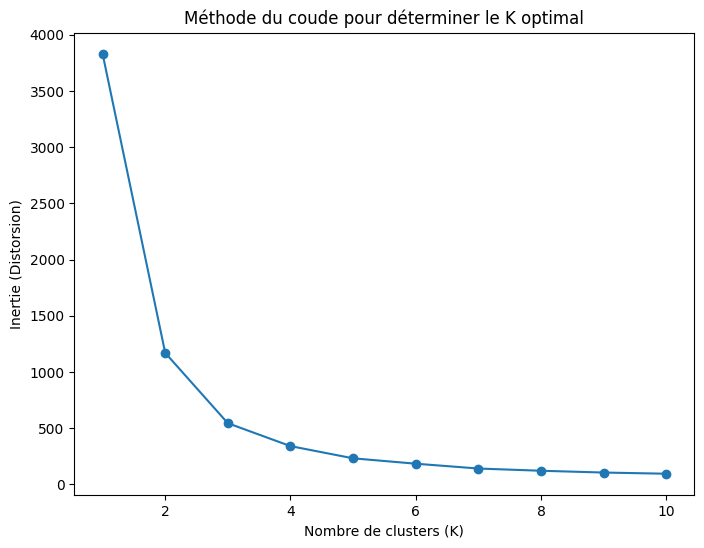

In [ ]:
# Liste pour stocker les inerties
inertia = []

# Tester pour un K allant de 1 à 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_data_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie (Distorsion)')
plt.title('Méthode du coude pour déterminer le K optimal')
plt.show()

## 2.2. <a id='toc2_2_'></a>[Évaluation de la qualité des clusters avec le Silhouette Score](#toc0_)

Après avoir utilisé la **méthode du coude** pour identifier un nombre potentiellement optimal de clusters, nous allons maintenant affiner cette analyse en nous appuyant sur le **Silhouette Score**. 

Le **Silhouette Score** permet d'évaluer la **qualité** des clusters formés en mesurant à la fois la **cohésion interne** des points au sein d'un même cluster et la **séparation** par rapport aux autres clusters. Plus le score est élevé, plus les clusters sont denses et bien séparés.

Nous allons calculer le Silhouette Score pour chaque valeur de **K** (de 2 à 10), puis tracer un graphique pour visualiser comment ce score évolue en fonction du nombre de clusters.

Pour K = 2, le Silhouette Score moyen est : 0.585215651604005
Pour K = 3, le Silhouette Score moyen est : 0.5585745785298585
Pour K = 4, le Silhouette Score moyen est : 0.5296604728388407
Pour K = 5, le Silhouette Score moyen est : 0.5243305687003565
Pour K = 6, le Silhouette Score moyen est : 0.5062466893870877
Pour K = 7, le Silhouette Score moyen est : 0.5074675073738845
Pour K = 8, le Silhouette Score moyen est : 0.48796666612601697
Pour K = 9, le Silhouette Score moyen est : 0.48581163258189786
Pour K = 10, le Silhouette Score moyen est : 0.49074011097888254


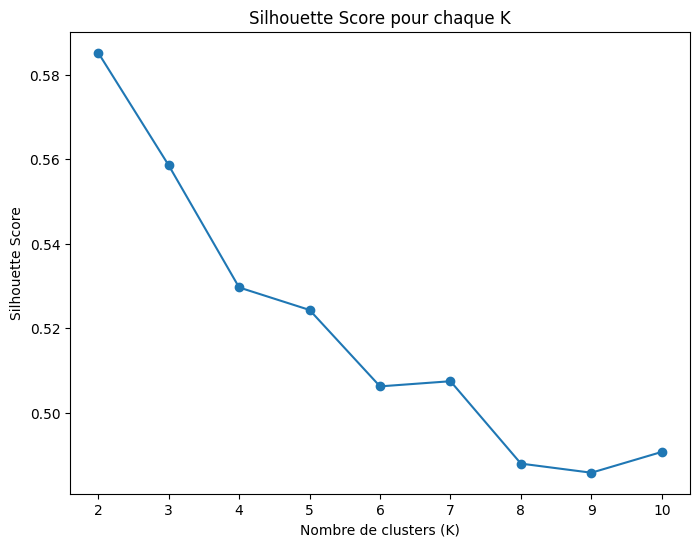

In [5]:
# Initialiser la liste pour stocker les silhouette scores
silhouette_scores = []

# Tester pour un K allant de 2 à 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_data_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_data_scaled, labels)
    silhouette_scores.append(silhouette_avg)  # Stocker le score dans la liste
    print(f"Pour K = {k}, le Silhouette Score moyen est : {silhouette_avg}")

# Tracer le graphique du Silhouette Score pour chaque K
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score pour chaque K')
plt.show()

In [ ]:
# Import nécessaire pour l'ARI
from sklearn.metrics import adjusted_rand_score

# Nombre de clusters optimal (déterminé par la méthode du coude et le Silhouette Score)
optimal_k = 4

# Réaliser plusieurs initialisations de K-Means pour vérifier la stabilité
n_initializations = 10  # Nombre d'initialisations différentes
labels_list = []

# Effectuer le clustering avec différentes initialisations
for i in range(n_initializations):
    kmeans = KMeans(n_clusters=optimal_k, random_state=i)  # Changer random_state à chaque fois
    labels = kmeans.fit_predict(rfm_data_scaled)
    labels_list.append(labels)

# Calculer l'ARI entre chaque paire d'initialisations pour vérifier la stabilité
ari_scores = []

for i in range(n_initializations):
    for j in range(i + 1, n_initializations):
        ari = adjusted_rand_score(labels_list[i], labels_list[j])
        ari_scores.append(ari)

# Afficher la moyenne et l'écart-type des scores ARI
ari_avg = sum(ari_scores) / len(ari_scores)
ari_std = (sum((x - ari_avg) ** 2 for x in ari_scores) / len(ari_scores)) ** 0.5

print(f"ARI moyen sur les différentes initialisations : {ari_avg:.3f}")
print(f"Écart-type des ARI : {ari_std:.3f}")

ARI moyen sur les différentes initialisations : 0.810
Écart-type des ARI : 0.196


# 3. <a id='toc3_'></a>[Stabilité à l'Initialisation du K-Means](#toc0_)

Le score ARI moyen de 0.810 reflète une bonne cohérence des clusters à travers les différentes initialisations, démontrant la robustesse générale de K-Means pour cette segmentation. L'écart-type de 0.196 révèle une légère variabilité, ce qui est courant avec K-Means en raison de l’influence des centres initiaux. Néanmoins, la stabilité observée reste suffisante pour garantir une segmentation fiable des clients, avec des variations limitées dans la répartition finale des clusters.

## 3.1. <a id='toc3_1_'></a>[Choix du nombre de clusters : 4](#toc0_)

Après avoir analysé les résultats de la **méthode du coude** et du **Silhouette Score**, nous avons décidé de choisir **4 clusters** pour segmenter les clients.

1. **Méthode du coude** : 
   - Comme le montre le graphique, nous observons un **point d'inflexion** autour de **K = 4**. Après ce point, l'ajout de clusters supplémentaires n'améliore plus de manière significative l'inertie (distorsion). Cela indique que **4 clusters** constitue un bon compromis entre la complexité du modèle et la qualité des regroupements.

2. **Silhouette Score** :
   - Bien que le **Silhouette Score** tende à diminuer à mesure que le nombre de clusters augmente, le score pour **K = 4** reste suffisamment élevé (~0.53), ce qui montre que les clusters sont encore bien séparés et cohérents à cette étape.

En conclusion, nous avons sélectionné **K = 4** pour obtenir une segmentation des clients qui soit à la fois **cohérente** et **pertinente** sans introduire de complexité excessive.

In [ ]:
# Appliquer K-means avec k = 4
kmeans = KMeans(n_clusters=4, random_state=42)

# Réaliser le clustering
df['cluster'] = kmeans.fit_predict(rfm_data_scaled)

# Afficher les premières lignes du DataFrame avec les clusters assignés
df[[
    'customer_unique_id', 'recency', 'frequency', 
    'total_spent', 'cluster'
]].head()

,customer_unique_id,recency,frequency,total_spent,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,160.273507,1,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163.263090,1,27.19,0
2,0000f46a3911fa3c0805444483337064,585.850868,1,86.22,3
3,0000f6ccb0745a6a4b88665a16c9f078,369.875428,1,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,336.905972,1,196.89,1


## 3.2. <a id='toc3_2_'></a>[Visualisation et interprétation des résultats](#toc0_)

Après avoir appliqué le clustering et assigné chaque client à un cluster, il est maintenant essentiel de **visualiser les résultats** afin de mieux **comprendre** la segmentation obtenue.

Nous allons d'abord calculer les **statistiques moyennes** pour chaque cluster afin d'identifier les caractéristiques principales des différents groupes de clients, en fonction des variables RFM et d'autres informations pertinentes comme le **score moyen des avis** et la **variété de produits** achetés.

Ensuite, nous allons représenter graphiquement les clusters pour mieux interpréter la répartition des clients selon la **récence**, la **fréquence**, et le **montant total dépensé** :
- Un **scatter plot** sera utilisé pour visualiser la relation entre la **récence** et le **montant total dépensé**, coloré par cluster.
- Nous utiliserons également un **pairplot** pour explorer les relations entre les variables RFM (**récence, fréquence, montant total**) et voir comment ces variables se comportent au sein des différents clusters.

Ces visualisations nous permettront de **mieux comprendre les différences** entre les groupes de clients et d’identifier des **tendances comportementales** clés au sein de la segmentation.

In [6]:
# Sélectionner uniquement les colonnes numériques (RFM + clusters)
numeric_columns = [
    'recency', 'frequency', 'total_spent',
    'avg_review_score', 'product_variety'
]

# Calculer les statistiques moyennes pour chaque cluster
cluster_stats = df.groupby('cluster')[numeric_columns].mean()

# Afficher les statistiques moyennes pour chaque cluster
cluster_stats

,recency,frequency,total_spent,avg_review_score,product_variety
cluster,,,,,
0,110.879236,1.040968,183.645110,4.242219,1.071346
1,363.396092,1.032895,178.811719,4.066465,1.058758
2,232.636681,1.036424,172.155309,3.950753,1.063932
3,534.163552,1.025756,176.518397,4.091384,1.045710


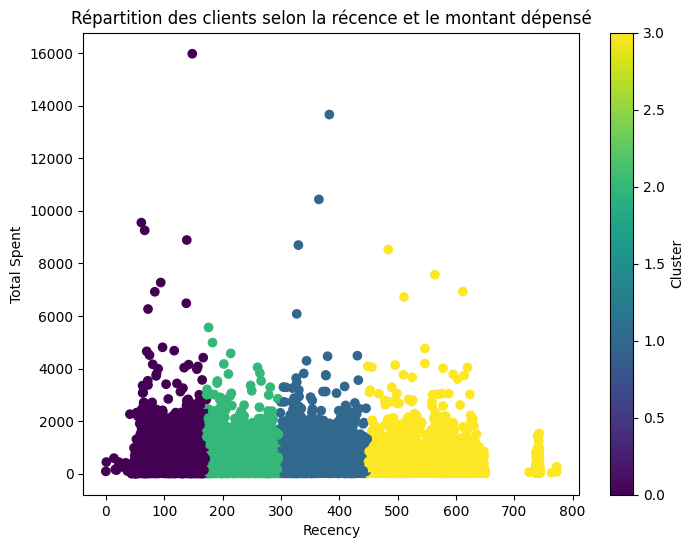

In [8]:
# Scatter plot pour recency vs total_spent, coloré par cluster
plt.figure(figsize=(8, 6))
plt.scatter(df['recency'], df['total_spent'], c=df['cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Total Spent')
plt.title('Répartition des clients selon la récence et le montant dépensé')
plt.colorbar(label='Cluster')
plt.show()

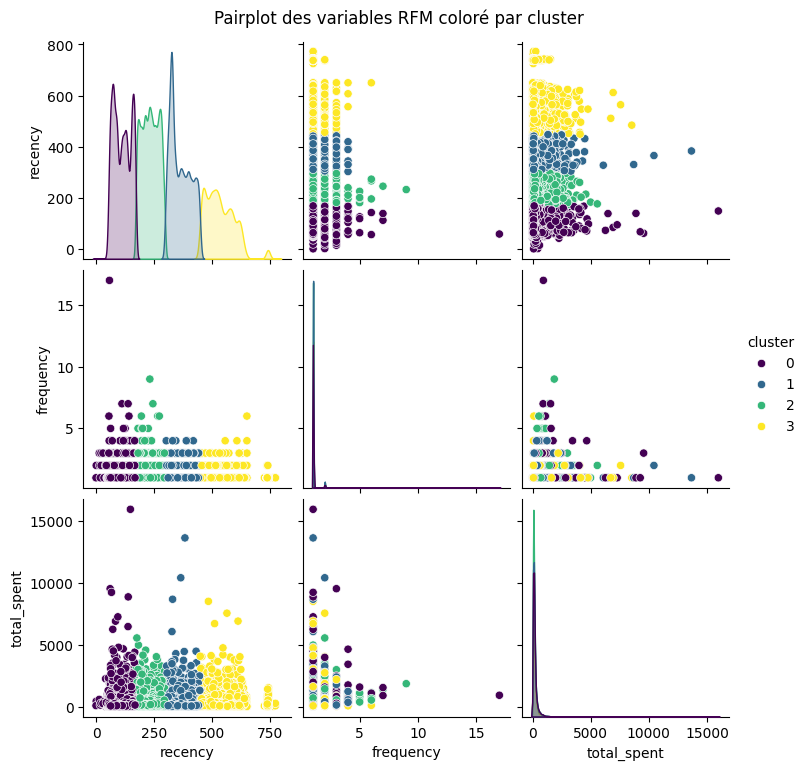

In [9]:
# Pairplot pour visualiser la relation entre recency, frequency et total_spent
sns.pairplot(
    df,
    vars=['recency', 'frequency', 'total_spent'],
    hue='cluster',
    palette='viridis',
    diag_kind='kde'
)
plt.suptitle('Pairplot des variables RFM coloré par cluster', y=1.02)
plt.show()

cluster
0    25874
1    25171
2    27811
3    17239
Name: count, dtype: int64


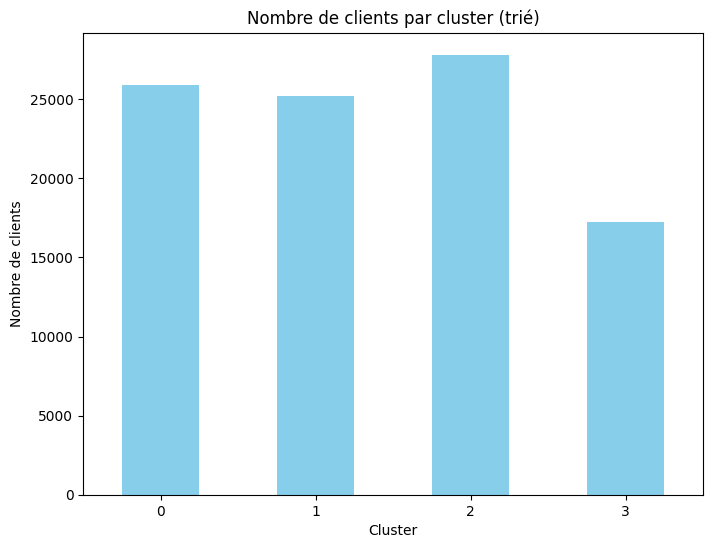

In [ ]:
# Compter le nombre de clients dans chaque cluster
cluster_counts = df['cluster'].value_counts()

# Réorganiser les clusters par ordre numérique croissant
cluster_counts_sorted = cluster_counts.sort_index()
print(cluster_counts_sorted)

# Créer un graphique à barres pour visualiser
# la répartition des clients par cluster (triée)
plt.figure(figsize=(8, 6))
cluster_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Nombre de clients par cluster (trié)')
plt.xlabel('Cluster')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=0)
plt.show()

## 3.3. <a id='toc3_3_'></a>[Interprétation des clusters avec les données non normalisées](#toc0_)

Après avoir appliqué l'algorithme **K-Means** sur les données **RFM**, nous avons analysé les **moyennes des données non normalisées** pour chaque cluster et observé la distribution des clients dans chaque groupe. Voici une interprétation des caractéristiques principales pour chaque cluster :

### 3.3.1. <a id='toc3_3_1_'></a>[Cluster 0 : Clients récents et légèrement plus dépensiers (25,874 clients)](#toc0_)
- Les clients de ce cluster sont les **plus récents**, avec une récence moyenne de **110.88 jours** depuis leur dernier achat.
- Ils ont effectué **en moyenne 1 achat**.
- Le **montant total dépensé** par ces clients est légèrement supérieur à celui des autres clusters, avec une moyenne de **183.65**.
- Ce groupe pourrait représenter des **clients récents** qui continuent à dépenser légèrement plus que les autres.

### 3.3.2. <a id='toc3_3_2_'></a>[Cluster 1 : Clients inactifs modérés (25,171 clients)](#toc0_)
- La récence moyenne pour ce cluster est de **363.40 jours**, ce qui suggère que ces clients sont inactifs depuis un certain temps, mais pas autant que ceux du cluster 3.
- Comme dans les autres clusters, ils ont une **fréquence d'achat faible**, avec en moyenne **1 achat**.
- Le montant total dépensé dans ce groupe est de **178.81**, ce qui est similaire aux autres clusters.
- Ce groupe pourrait être composé de **clients inactifs modérés** qui n'ont pas fait de nouveaux achats récemment.

### 3.3.3. <a id='toc3_3_3_'></a>[Cluster 2 : Clients inactifs récents (27,811 clients)](#toc0_)
- Les clients de ce cluster ont une récence moyenne de **232.64 jours**, ce qui les place entre les clients récents et les plus inactifs.
- Ils ont aussi une **fréquence d'achat de 1** en moyenne.
- Le montant total dépensé est de **172.16**, ce qui est le plus bas parmi les clusters, indiquant que ces clients ont dépensé moins lors de leur(s) commande(s).
- Ce groupe pourrait représenter des **clients relativement récents** qui n’ont pas beaucoup dépensé.

### 3.3.4. <a id='toc3_3_4_'></a>[Cluster 3 : Clients les plus inactifs (17,239 clients)](#toc0_)
- Ce cluster regroupe les clients **les plus inactifs**, avec une récence moyenne de **534.16 jours**, ce qui indique qu’ils n’ont pas effectué d’achat depuis longtemps.
- Ils ont également une **fréquence d'achat faible**, avec **1 achat** en moyenne, similaire aux autres clusters.
- Le montant total dépensé est de **176.52**, ce qui reste proche de celui des autres clusters.
- Ce groupe pourrait être composé de **clients perdus** ou inactifs depuis longtemps, nécessitant potentiellement des stratégies de **réengagement**.

### 3.3.5. <a id='toc3_3_5_'></a>[Conclusion :](#toc0_)
- **Recency** est la variable qui montre les plus grandes différences entre les clusters, ce qui signifie que la segmentation est principalement basée sur le temps écoulé depuis le dernier achat.
- **Frequency** et **Total Spent** montrent peu de variation entre les clusters, ce qui indique qu’elles ne sont pas des facteurs de différenciation majeurs dans cette segmentation.
- En résumé, les clusters montrent différentes catégories de clients, allant des **clients récents** à ceux qui sont **inactifs depuis longtemps**, avec des différences subtiles dans les montants dépensés.

## 3.4. <a id='toc3_4_'></a>[Visualisation des clusters avec des Radar Plots](#toc0_)

Après avoir appliqué l'algorithme **K-Means** et segmenté les clients en plusieurs groupes selon les variables **RFM** (Récence, Fréquence, Montant total dépensé), nous souhaitons maintenant **visualiser les différences** entre ces clusters de manière plus intuitive.

Nous allons utiliser des **Radar Plots** pour représenter graphiquement les caractéristiques moyennes de chaque cluster sur les trois dimensions RFM. Ces graphiques permettent de voir en un coup d'œil comment chaque cluster se distingue des autres en termes de récence, de fréquence, et de montant total dépensé.

Dans un premier temps, nous traçons un **Radar Plot global** où les quatre clusters sont superposés pour voir la distribution générale des comportements. Ensuite, nous représentons chaque cluster **individuellement**, avec un radar plot dédié, afin d'analyser les particularités de chaque groupe de clients.

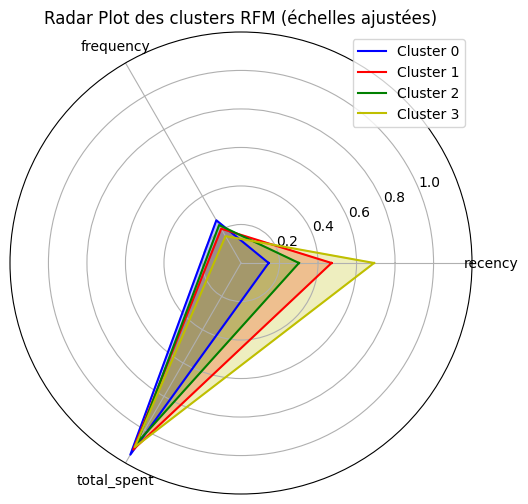

In [10]:
# Calculer les moyennes des données normalisées pour chaque cluster
cluster_stats_normalized = pd.DataFrame(
    rfm_data_scaled,
    columns=['recency', 'frequency', 'total_spent']
).groupby(df['cluster']).mean()

# Appliquer un facteur d'échelle sur 'frequency'
# et 'total_spent' pour équilibrer les variables.
# Cela permet de rendre les écarts plus visibles dans le radar plot
cluster_stats_normalized['frequency'] *= 100
cluster_stats_normalized['total_spent'] *= 100

# Préparer le radar plot
categories = list(cluster_stats_normalized.columns)
N = len(categories)

# Créer l'angle pour chaque catégorie du radar plot
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Boucler sur chaque cluster pour tracer les graphiques radar
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Tracer les clusters avec des couleurs distinctes
colors = ['b', 'r', 'g', 'y']

for i in range(len(cluster_stats_normalized)):
    values = cluster_stats_normalized.iloc[i].values.flatten().tolist()
    values += values[:1]  # Fermer le cercle

    ax.fill(angles, values, color=colors[i], alpha=0.25)
    ax.plot(angles, values, color=colors[i], label=f'Cluster {i}')

# Ajouter les labels et le titre
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Radar Plot des clusters RFM (échelles ajustées)')
plt.legend(loc='upper right')
plt.show()

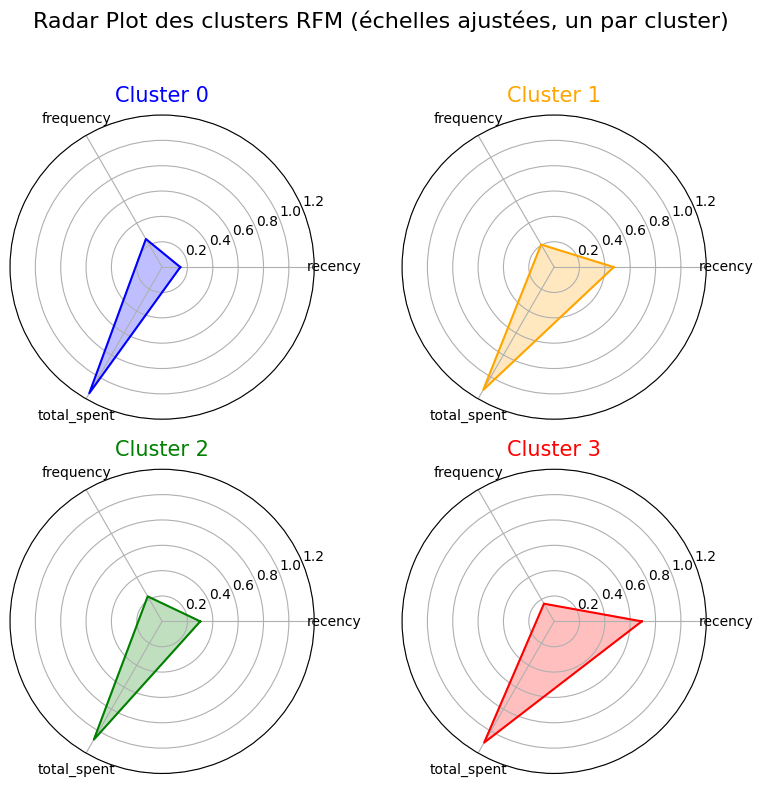

In [ ]:
# Fonction pour tracer les radar plots pour chaque cluster séparément
def radar_plot_individual_clusters(cluster_means, categories, title):
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, axs = plt.subplots(2, 2, figsize=(8, 8), subplot_kw=dict(polar=True))

    # Couleurs pour chaque cluster
    colors = ['b', 'orange', 'g', 'r']

    for i, ax in enumerate(axs.flat):
        cluster_data = cluster_means.iloc[i].values.flatten().tolist()
        cluster_data += cluster_data[:1]  # Reboucler pour fermer le radar plot

        # Tracer le radar plot pour chaque cluster
        ax.fill(angles, cluster_data, color=colors[i], alpha=0.25)
        ax.plot(angles, cluster_data, color=colors[i], label=f'Cluster {i}')

        # Ajouter les labels et le titre du radar plot pour chaque cluster
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)
        ax.set_title(
            f'Cluster {i}', color=colors[i], size=15, pad=10
        )  # Ajuster le padding

        ax.set_ylim(0, 1.2)  # Limiter l'axe Y

    # Ajuster le titre principal
    plt.suptitle(title, size=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Appel de la fonction avec les catégories et les données normalisées
categories = ['recency', 'frequency', 'total_spent']

radar_plot_individual_clusters(
    cluster_stats_normalized,
    categories,
    "Radar Plot des clusters RFM (échelles ajustées, un par cluster)"
)

## 3.5. <a id='toc3_5_'></a>[Interprétation des Radar Plots des clusters RFM](#toc0_)

Les **Radar Plots** ci-dessus permettent de visualiser les différences principales entre les **clusters** basés sur les données **RFM** (Récence, Fréquence, Montant total dépensé). Chaque dimension est représentée sur un axe radial, et les graphiques montrent clairement les écarts entre les différents groupes de clients.

### 3.5.1. <a id='toc3_5_1_'></a>[Radar Plot Global (Superposition des clusters) :](#toc0_)
- Ce graphique montre la **superposition** des quatre clusters, offrant une vue d'ensemble des différences entre les groupes.
- On observe que les **variations les plus importantes** concernent la **récence** (recency), avec des écarts significatifs entre les clusters.
- La **fréquence d'achat** (frequency) et le **montant total dépensé** (total spent) sont relativement similaires entre les groupes, bien qu'il y ait des légères différences visibles, notamment pour le **cluster 0**, qui semble légèrement plus distinct sur ces dimensions.

### 3.5.2. <a id='toc3_5_2_'></a>[Radar Plots Individuels (Un plot par cluster) :](#toc0_)
Ces graphiques permettent de mieux comprendre les caractéristiques spécifiques à chaque cluster.

- **Cluster 0** (en bleu) : 
  - Les clients de ce groupe se démarquent par une **récence très faible** (clients récents), ce qui signifie qu'ils ont effectué des achats récemment.
  - Ils ont également un niveau légèrement supérieur de **fréquence d'achat** et de **montant total dépensé**, indiquant que ce groupe pourrait représenter des **clients actifs et relativement dépensiers**.

- **Cluster 1** (en orange) :
  - Ce groupe présente une **récence plus élevée**, ce qui signifie que les clients n'ont pas effectué d'achat depuis un certain temps.
  - Leurs valeurs de **fréquence** et de **montant dépensé** sont proches de celles des autres clusters, suggérant que ce sont des **clients modérément inactifs**.

- **Cluster 2** (en vert) :
  - Les clients de ce cluster ont une **récence modérée** (entre les clusters 0 et 1), ce qui signifie qu'ils ne sont pas très récents mais pas aussi inactifs que ceux du cluster 1.
  - Le **montant total dépensé** par ces clients est également légèrement inférieur à celui des autres clusters, ce qui pourrait indiquer qu'ils ont un **profil d'acheteurs occasionnels**.

- **Cluster 3** (en rouge) :
  - Les clients de ce groupe sont les **plus inactifs**, avec une **récence très élevée**. Cela indique qu'ils n'ont pas fait d'achat depuis longtemps.
  - Leur **fréquence d'achat** et leur **montant total dépensé** sont parmi les plus bas, suggérant qu'il s'agit de **clients potentiellement désengagés** ou inactifs depuis longtemps.

### 3.5.3. <a id='toc3_5_3_'></a>[Conclusion :](#toc0_)
- Les **variations de récence** sont les plus significatives dans la différenciation des clusters, tandis que les différences en termes de **fréquence d'achat** et de **montant dépensé** sont relativement faibles.
- Les **clusters 0 et 3** montrent des contrastes importants, avec le cluster 0 regroupant des **clients récents** et légèrement plus dépensiers, tandis que le cluster 3 représente des **clients inactifs** depuis un certain temps.
- Ces analyses permettent de mieux comprendre les comportements des différents groupes de clients, et peuvent être utilisées pour définir des stratégies de **marketing ciblé** ou de **réengagement**.

## 3.6. <a id='toc3_6_'></a>[Conclusion sur l'efficacité de K-Means](#toc0_)

L'application de **K-Means** avec **4 clusters** nous a permis d'obtenir une segmentation cohérente des clients en fonction des variables **Récence**, **Fréquence** et **Montant total dépensé**. Les résultats, illustrés par les **scatter plots** et les **pairplots**, montrent des groupes de clients relativement bien distincts.

- Les **clusters** sont bien répartis selon la récence et le montant total dépensé, comme le montre le graphique de répartition. Cela reflète des tendances claires dans le comportement des clients, avec des groupes différenciés selon leur **ancienneté** et leur **dépense totale**.
- Le **pairplot** nous donne une vue plus complète des relations entre les variables RFM. Nous observons des tendances logiques : les clients avec une plus grande **fréquence d'achat** ont tendance à appartenir à des clusters avec des montants dépensés plus élevés.

Globalement, **K-Means** semble être une méthode efficace pour la segmentation initiale des clients. Toutefois, nous allons poursuivre l'analyse avec d'autres méthodes de clustering, telles que **DBSCAN** et **Agglomerative Clustering**, afin de comparer leurs performances et de sélectionner la méthode la plus appropriée pour des analyses plus approfondies.

# 4. <a id='toc4_'></a>[Clustering avec DBSCAN](#toc0_)

Après avoir réalisé un premier clustering avec K-means, nous souhaitons explorer une autre approche basée sur la densité des points : **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise). Cet algorithme est particulièrement utile pour identifier des clusters de **densité variable** et pour détecter des **outliers** (points aberrants) qui ne se rattachent à aucun cluster.

Contrairement à **K-Means**, qui tend à former des clusters de forme sphérique, **DBSCAN** peut capturer des **clusters de formes plus complexes**, ce qui en fait un bon candidat lorsque les regroupements dans les données ne suivent pas des formes régulières.

L'objectif ici est d'examiner si DBSCAN peut mieux capturer des regroupements naturels dans les données **RFM** (Recency, Frequency, Monetary). Nous allons ajuster les paramètres `eps` (la distance maximale pour qu'un point soit considéré dans le même cluster) et `min_samples` (le nombre minimum de points pour qu'un cluster soit validé), et observer comment ces réglages affectent le clustering.

In [12]:
# Appliquer DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
df['cluster_dbscan'] = dbscan.fit_predict(rfm_data_scaled)

# Afficher les premières lignes avec le clustering DBSCAN
df[
    [
        'customer_unique_id',
        'recency',
        'frequency',
        'total_spent',
        'cluster_dbscan'
    ]
].head()

,customer_unique_id,recency,frequency,total_spent,cluster_dbscan
0,0000366f3b9a7992bf8c76cfdf3221e2,160.273507,1,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163.263090,1,27.19,0
2,0000f46a3911fa3c0805444483337064,585.850868,1,86.22,0
3,0000f6ccb0745a6a4b88665a16c9f078,369.875428,1,43.62,0
4,0004aac84e0df4da2b147fca70cf8255,336.905972,1,196.89,0


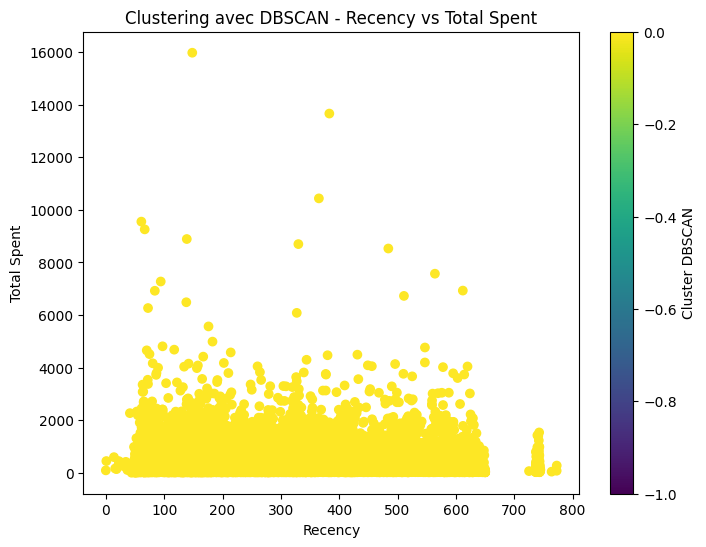

In [ ]:
# Visualiser la répartition des clusters DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(
    df['recency'], df['total_spent'],
    c=df['cluster_dbscan'], cmap='viridis'
)
plt.xlabel('Recency')
plt.ylabel('Total Spent')
plt.title('Clustering avec DBSCAN - Recency vs Total Spent')
plt.colorbar(label='Cluster DBSCAN')
plt.show()

## 4.1. <a id='toc4_1_'></a>[Résultats du clustering avec DBSCAN](#toc0_)

Nous avons appliqué **DBSCAN** avec des paramètres initiaux (`eps = 0.5` et `min_samples = 10`) pour observer comment l'algorithme segmente les clients selon les données **RFM**.

### 4.1.1. <a id='toc4_1_1_'></a>[Observations :](#toc0_)
- Le graphique montre la répartition des clients en fonction de la **récence** et du **montant total dépensé**, colorée selon les clusters identifiés par DBSCAN.
- Avec ces paramètres initiaux, nous constatons que la majorité des clients sont regroupés dans un seul cluster (cluster 0), ce qui suggère que les réglages actuels de DBSCAN sont peut-être trop permissifs pour détecter des sous-groupes dans les données.
- De plus, peu ou pas de points sont identifiés comme des **outliers** (marqués comme -1 dans DBSCAN), ce qui peut également indiquer que les critères pour former des clusters sont trop larges.

### 4.1.2. <a id='toc4_1_2_'></a>[Ajustements à venir :](#toc0_)
Pour mieux capturer les **différences de densité** dans les données, nous allons ajuster les paramètres de DBSCAN :
- **Diminuer `eps`** : En réduisant la distance maximale entre les points pour qu'ils soient considérés dans le même cluster, nous espérons obtenir des clusters plus denses et compacts.
- **Augmenter `min_samples`** : En augmentant le nombre minimum de points requis pour former un cluster, nous allons tenter de mieux filtrer les points isolés et obtenir des clusters plus robustes.

Ces ajustements devraient permettre de mieux détecter des sous-groupes plus significatifs parmi les clients.

In [14]:
# Ajuster les paramètres de DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=15)
df['cluster_dbscan'] = dbscan.fit_predict(rfm_data_scaled)

# Afficher les premières lignes avec les clusters DBSCAN
df[
    [
        'customer_unique_id',
        'recency',
        'frequency',
        'total_spent',
        'cluster_dbscan'
    ]
].head()

,customer_unique_id,recency,frequency,total_spent,cluster_dbscan
0,0000366f3b9a7992bf8c76cfdf3221e2,160.273507,1,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163.263090,1,27.19,0
2,0000f46a3911fa3c0805444483337064,585.850868,1,86.22,0
3,0000f6ccb0745a6a4b88665a16c9f078,369.875428,1,43.62,0
4,0004aac84e0df4da2b147fca70cf8255,336.905972,1,196.89,0


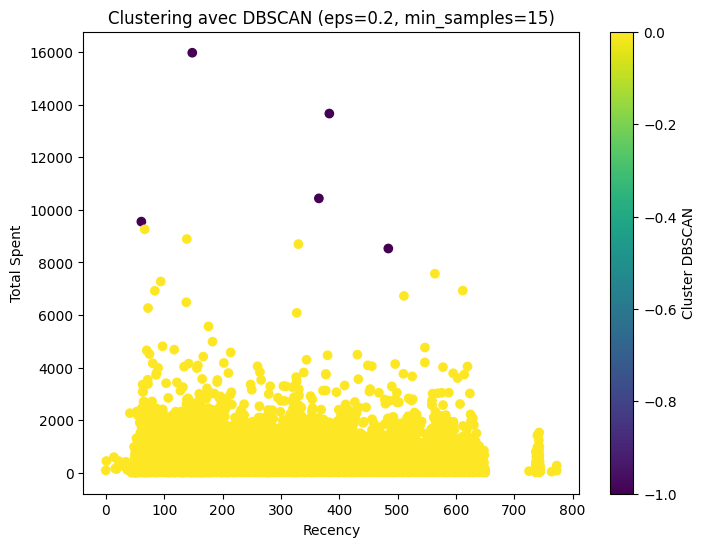

In [ ]:
# Visualiser les résultats
plt.figure(figsize=(8, 6))
plt.scatter(
    df['recency'], df['total_spent'],
    c=df['cluster_dbscan'], cmap='viridis'
)
plt.xlabel('Recency')
plt.ylabel('Total Spent')
plt.title('Clustering avec DBSCAN (eps=0.2, min_samples=15)')
plt.colorbar(label='Cluster DBSCAN')
plt.show()

## 4.2. <a id='toc4_2_'></a>[Observations sur DBSCAN et conclusion](#toc0_)

Après avoir ajusté les paramètres de **DBSCAN** (`eps = 0.2, min_samples = 15`), nous avons obtenu les résultats suivants sur le graphique de répartition des clients selon la **récence** et le **montant total dépensé**.

### 4.2.1. <a id='toc4_2_1_'></a>[Observations :](#toc0_)
- Le **cluster principal** (en jaune) regroupe la quasi-totalité des clients, ce qui suggère que DBSCAN n'a pas réussi à identifier des sous-groupes significatifs dans les données.
- Les quelques points restants (en violet) sont considérés comme des **outliers** par l'algorithme, mais ils sont très rares et ne permettent pas d'obtenir des clusters distincts.
- Malgré les ajustements des paramètres `eps` (qui contrôle la distance maximale entre les points d'un même cluster) et `min_samples` (qui contrôle le nombre minimal de points pour former un cluster), DBSCAN continue de regrouper la majorité des données dans un seul cluster.

### 4.2.2. <a id='toc4_2_2_'></a>[Conclusion :](#toc0_)
Dans le contexte de nos données **RFM**, **DBSCAN** ne semble pas être une méthode pertinente pour segmenter les clients. L'algorithme ne parvient pas à identifier des regroupements naturels dans les données, et la majorité des points sont regroupés dans un seul cluster.

Cela peut s'expliquer par la **structure des données** RFM, qui ne présente peut-être pas la densité requise pour que DBSCAN puisse identifier des clusters significatifs. Par conséquent, nous allons explorer d'autres méthodes de clustering, comme l'**Agglomerative Clustering**, pour voir si elles sont mieux adaptées à notre jeu de données.

# 5. <a id='toc5_'></a>[AgglomerativeClustering](#toc0_)

## 5.1. <a id='toc5_1_'></a>[Tentative avec Agglomerative Clustering](#toc0_)

Après avoir testé **K-means** et **DBSCAN**, nous avons décidé d'explorer une autre méthode de clustering : **Agglomerative Clustering**. Cet algorithme hiérarchique construit les clusters en fusionnant successivement des groupes de points en fonction de leur proximité, jusqu'à obtenir le nombre de clusters souhaité.

Nous avons choisi d'utiliser la méthode de **linkage "ward"**, qui minimise la variance à l'intérieur des clusters.

Cette approche est utile pour explorer des relations plus complexes dans les données, mais elle peut être coûteuse en termes de temps de calcul pour des datasets de grande taille, comme c'est le cas ici.

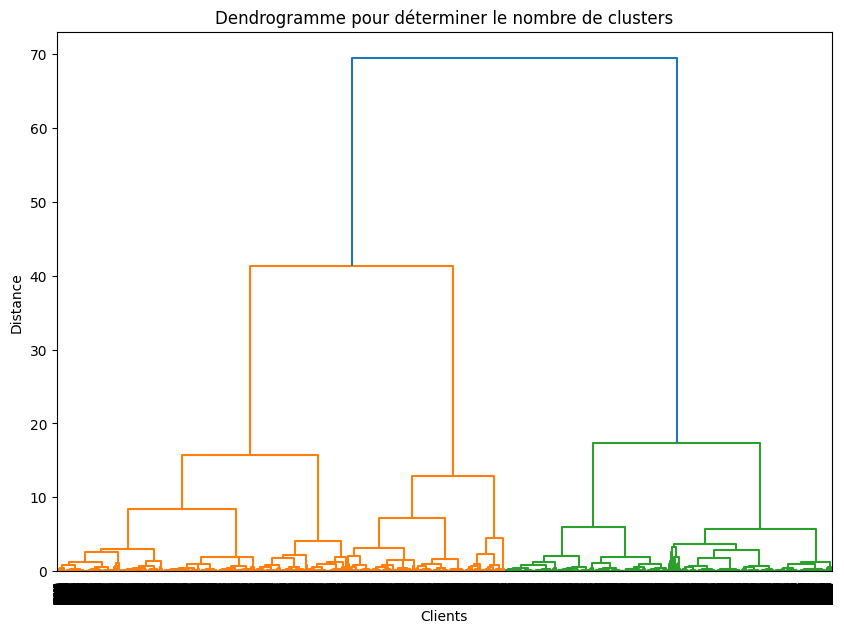

Temps d'exécution du dendrogramme : 1097.28 secondes
L'algorithme s'est terminé dans le temps imparti.


In [ ]:
# Fonction pour exécuter le clustering et tracer le dendrogramme
def run_clustering():
    start_time = time.time()

    # Calculer le linkage hiérarchique
    linked = linkage(rfm_data_scaled, method='ward')

    # Tracer le dendrogramme pour déterminer le nombre de clusters
    plt.figure(figsize=(10, 7))
    dendrogram(
        linked, orientation='top',
        distance_sort='descending', show_leaf_counts=False
    )
    plt.title('Dendrogramme pour déterminer le nombre de clusters')
    plt.xlabel('Clients')
    plt.ylabel('Distance')
    plt.show()

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(
        f"Temps d'exécution du dendrogramme : "
        f"{elapsed_time:.2f} secondes"
    )

# Créer un thread pour le clustering
clustering_thread = threading.Thread(target=run_clustering)

# Démarrer le thread
clustering_thread.start()

# Attendre une heure (3600 secondes)
clustering_thread.join(timeout=3600)

# Vérifier si le thread est toujours en cours d'exécution après une heure
if clustering_thread.is_alive():
    print(
        "L'exécution a été interrompue après 1 heure "
        "car l'algorithme était trop lent."
    )
    # Terminer le thread (Python ne permet pas de tuer proprement un thread)
else:
    print("L'algorithme s'est terminé dans le temps imparti.")

## 5.2. <a id='toc5_2_'></a>[Détermination du nombre optimal de clusters à partir du dendrogramme](#toc0_)

En analysant le **dendrogramme**, nous avons identifié que le **nombre optimal de clusters** est **3**. Cette conclusion est basée sur une coupe à une **hauteur d’environ 20**, où nous observons une séparation naturelle en trois groupes distincts. Cette coupe permet de segmenter les clients en trois clusters bien définis, correspondant à des comportements distincts en termes de **Récence**, **Fréquence**, et **Montant total dépensé**.

Le choix de 3 clusters est suffisamment précis pour capturer les principales différences entre les groupes de clients, tout en maintenant une segmentation claire et exploitable pour notre analyse.

Nous allons maintenant appliquer **Agglomerative Clustering** avec ces **3 clusters** pour approfondir notre segmentation des clients.

In [17]:
# Calcul du temps d'exécution
start_time = time.time()

# Appliquer Agglomerative Clustering avec 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['cluster_agglo'] = agg_clustering.fit_predict(rfm_data_scaled)

# Calcul du temps d'exécution
elapsed_time = time.time() - start_time

# Afficher la durée totale
print(
    f"Temps d'exécution pour Agglomerative Clustering: "
    f"{elapsed_time:.2f} secondes"
)

Temps d'exécution pour Agglomerative Clustering: 588.49 secondes


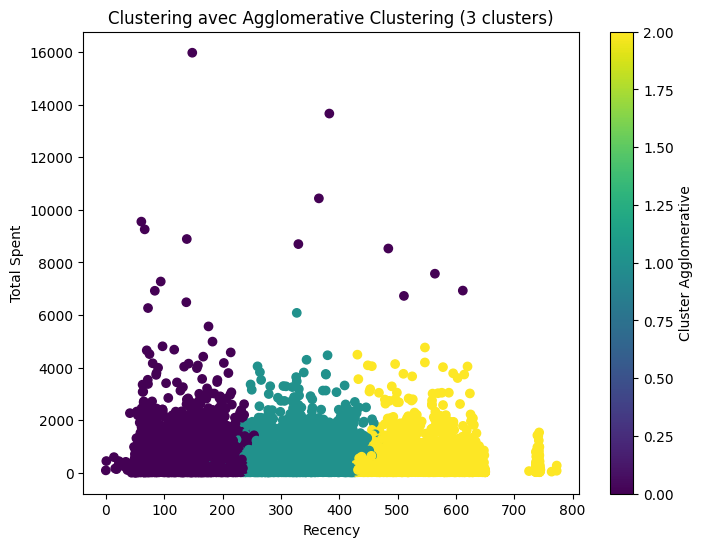

In [ ]:
# Visualiser la répartition des clusters Agglomerative
plt.figure(figsize=(8, 6))
plt.scatter(
    df['recency'], df['total_spent'],
    c=df['cluster_agglo'], cmap='viridis'
)
plt.xlabel('Recency')
plt.ylabel('Total Spent')
plt.title('Clustering avec Agglomerative Clustering (3 clusters)')
plt.colorbar(label='Cluster Agglomerative')
plt.show()

## 5.3. <a id='toc5_3_'></a>[Conclusion sur Agglomerative Clustering](#toc0_)

Après avoir exécuté avec succès **Agglomerative Clustering** sur l'ensemble du dataset, nous avons constaté que cette méthode permet de **capturer efficacement les relations hiérarchiques** dans les données, en particulier avec la méthode de **linkage "ward"**, qui minimise la variance au sein des clusters.

Contrairement à nos attentes initiales, le temps de calcul s'est avéré **raisonnable** pour notre dataset de **96 095 lignes**, rendant cette approche **praticable** dans notre contexte. Les **3 clusters** obtenus permettent une segmentation pertinente des clients selon leurs comportements en termes de **récence, fréquence et montant dépensé**.

Cependant, bien que **Agglomerative Clustering** ait bien fonctionné ici, il reste **plus coûteux en termes de ressources** que d'autres méthodes comme **K-means**. Il pourrait donc ne pas être le premier choix si la **rapidité d'exécution** est une priorité absolue, notamment avec des datasets beaucoup plus volumineux.

En conclusion, **Agglomerative Clustering** s'avère être une approche **adaptée** à notre projet, nous permettant de segmenter efficacement les clients, tout en restant conscient de son **coût en calcul** dans certains contextes.

# 6. <a id='toc6_'></a>[Conclusion générale sur le choix de la méthode de clustering](#toc0_)

Après avoir testé trois méthodes de clustering non supervisé — **K-Means**, **DBSCAN**, et **Agglomerative Clustering** — nous avons choisi d’utiliser **K-Means** pour la segmentation des clients dans ce projet. Voici les raisons principales qui motivent ce choix :

1. **K-Means** s'est montré à la fois **efficace** et **rapide**. La méthode du coude et le Silhouette Score ont révélé que **4 clusters** constituent un bon compromis, offrant une segmentation cohérente et exploitable des clients. La simplicité d’implémentation et la rapidité de calcul font de K-Means un outil adapté à ce type d’analyse, surtout sur des datasets de grande taille comme le nôtre.

2. **DBSCAN** n’a pas produit les résultats escomptés. Malgré l'ajustements des paramètres, cet algorithme n’a pas réussi à identifier des groupes distincts dans les données. Cela est probablement dû à la **distribution uniforme des clients** dans les variables RFM, qui ne présentent pas de variations de densité suffisantes pour exploiter pleinement les capacités de DBSCAN.

3. **Agglomerative Clustering**, bien qu’efficace dans la capture des relations hiérarchiques entre les points, s’avère **plus coûteux en termes de ressources** que K-Means, sans pour autant offrir de résultats significativement meilleurs. Avec un nombre de clusters similaire (3 ou 4), K-Means se révèle plus rapide, tout en étant capable de segmenter les clients de manière pertinente.

En conclusion, bien que chaque méthode ait ses avantages dans certains contextes, **K-Means** se distingue ici par son **efficacité**, sa **simplicité d’implémentation**, et sa **rapidité d’exécution**, ce qui en fait le meilleur choix pour notre projet de segmentation des clients. Nous utiliserons donc cette méthode pour les analyses plus approfondies à venir.

# 7. <a id='toc7_'></a>[K-Means avec RFM et avg_review_score](#toc0_)

Après avoir réalisé un premier clustering en utilisant uniquement les variables **RFM** (Récence, Fréquence, Montant total dépensé), nous allons maintenant appliquer l'algorithme **K-Means** en ajoutant une nouvelle dimension : le **score moyen des avis** (**avg_review_score**).

## 7.1. <a id='toc7_1_'></a>[Pourquoi ajouter le avg_review_score ?](#toc0_)
Le score moyen des avis est une mesure importante de la satisfaction client, et pourrait apporter une nouvelle perspective sur la segmentation des clients. En ajoutant cette variable, nous espérons :
- **Mieux différencier** les clients en fonction de leur satisfaction et de leur comportement d'achat.
- Identifier des sous-groupes de clients qui non seulement dépensent plus ou achètent fréquemment, mais qui ont également tendance à laisser des **avis positifs** (ou négatifs).

Nous allons suivre la **même méthodologie** que pour le premier **K-Means** (avec RFM uniquement), en passant par les étapes suivantes :
1. **Normalisation** des données pour garantir que toutes les variables (RFM + avg_review_score) ont la même échelle.
2. Utilisation de la **méthode du coude** et du **Silhouette Score** pour déterminer le **nombre optimal de clusters**.
3. **Interprétation** des résultats pour comprendre comment cette nouvelle dimension influence la segmentation.

L'objectif est d'explorer si l'ajout du **score moyen des avis** permet d'obtenir des clusters plus pertinents et d'affiner notre analyse du comportement client.

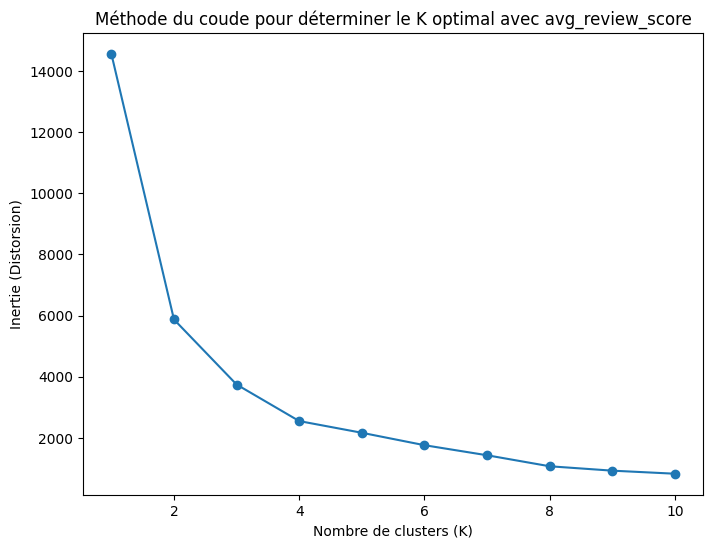

In [19]:
# Normaliser les variables RFM + 'avg_review_score'
scaler = MinMaxScaler()
X_rfm_avg_review_scaled = scaler.fit_transform(
    df[['recency', 'frequency', 'total_spent', 'avg_review_score']]
)

# Méthode du coude pour déterminer le K optimal
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_rfm_avg_review_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 6))
plt.plot(
    range(1, 11), inertia,
    marker='o'
)
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie (Distorsion)')
plt.title(
    'Méthode du coude pour déterminer le K optimal avec avg_review_score'
)
plt.show()

Pour K = 2, le Silhouette Score moyen est : 0.5885240107143824
Pour K = 3, le Silhouette Score moyen est : 0.45924482112709125
Pour K = 4, le Silhouette Score moyen est : 0.49106164027243665
Pour K = 5, le Silhouette Score moyen est : 0.4731617854930855
Pour K = 6, le Silhouette Score moyen est : 0.47405922885426494
Pour K = 7, le Silhouette Score moyen est : 0.480152800417521
Pour K = 8, le Silhouette Score moyen est : 0.5146792253099395
Pour K = 9, le Silhouette Score moyen est : 0.5210494472495912
Pour K = 10, le Silhouette Score moyen est : 0.5317064953429057


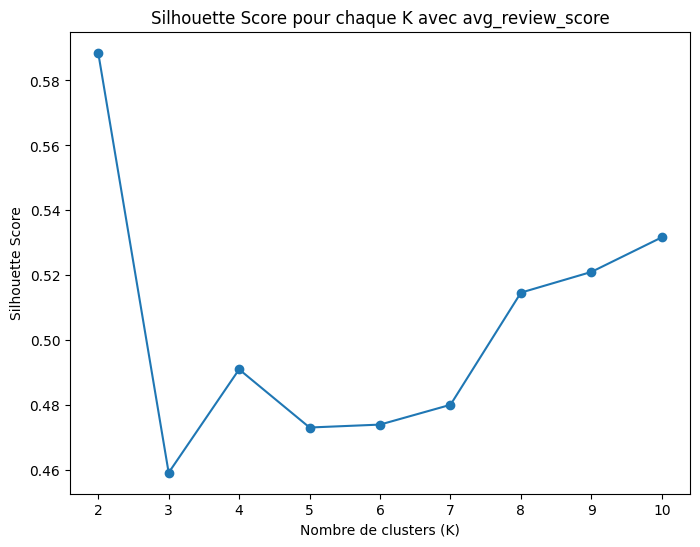

In [ ]:
# Calcul du Silhouette Score pour chaque K
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_rfm_avg_review_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_rfm_avg_review_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    print(
        f"Pour K = {k}, le Silhouette Score moyen est : "
        f"{silhouette_avg}"
    )

# Tracer le graphique du Silhouette Score pour chaque K
plt.figure(figsize=(8, 6))
plt.plot(
    range(2, 11), silhouette_scores,
    marker='o'
)
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score pour chaque K avec avg_review_score')
plt.show()

## 7.2. <a id='toc7_2_'></a>[Choix de K = 4 pour le K-Means avec avg_review_score](#toc0_)

Comme pour notre première analyse avec K-Means, nous avons utilisé la **méthode du coude** et le **Silhouette Score** pour déterminer le nombre optimal de clusters. 

- Le graphique de la méthode du coude montre un point d'inflexion autour de **K = 4**, ce qui indique que l'ajout de clusters supplémentaires n'améliore plus significativement l'inertie.
- Bien que le **Silhouette Score** ne soit pas maximal pour **K = 4**, il reste suffisamment élevé (~0.48), ce qui justifie notre choix pour cette valeur de **K** afin de garantir une segmentation cohérente et pertinente.

Ainsi, nous poursuivons avec **K = 4** pour cette étape de clustering avec les variables **RFM** et **avg_review_score**.

            recency  frequency  total_spent  avg_review_score
cluster                                                      
0        182.781446   1.038672   167.033119          4.996734
1        294.938709   1.025079   223.360598          1.224858
2        239.947515   1.040962   172.373873          3.646505
3        463.942107   1.029762   172.096582          4.778721


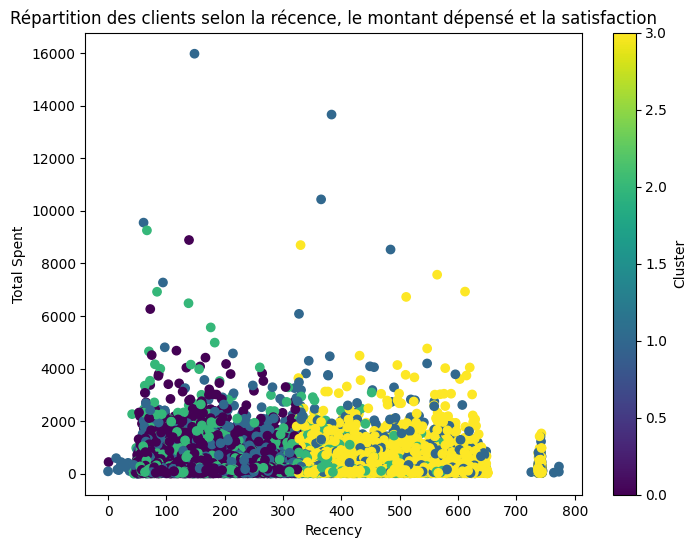

In [21]:
# Appliquer K-means avec le K optimal (par exemple, K = 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_rfm_avg_review_scaled)

# Afficher les statistiques moyennes par cluster
numeric_columns = ['recency', 'frequency', 'total_spent', 'avg_review_score']
cluster_stats = df.groupby('cluster')[numeric_columns].mean()
print(cluster_stats)

# Visualisation : Scatter plot pour recency vs total_spent
plt.figure(figsize=(8, 6))
plt.scatter(
    df['recency'], df['total_spent'],
    c=df['cluster'], cmap='viridis'
)
plt.xlabel('Recency')
plt.ylabel('Total Spent')
plt.title(
    'Répartition des clients selon la récence, '
    'le montant dépensé et la satisfaction'
)
plt.colorbar(label='Cluster')
plt.show()

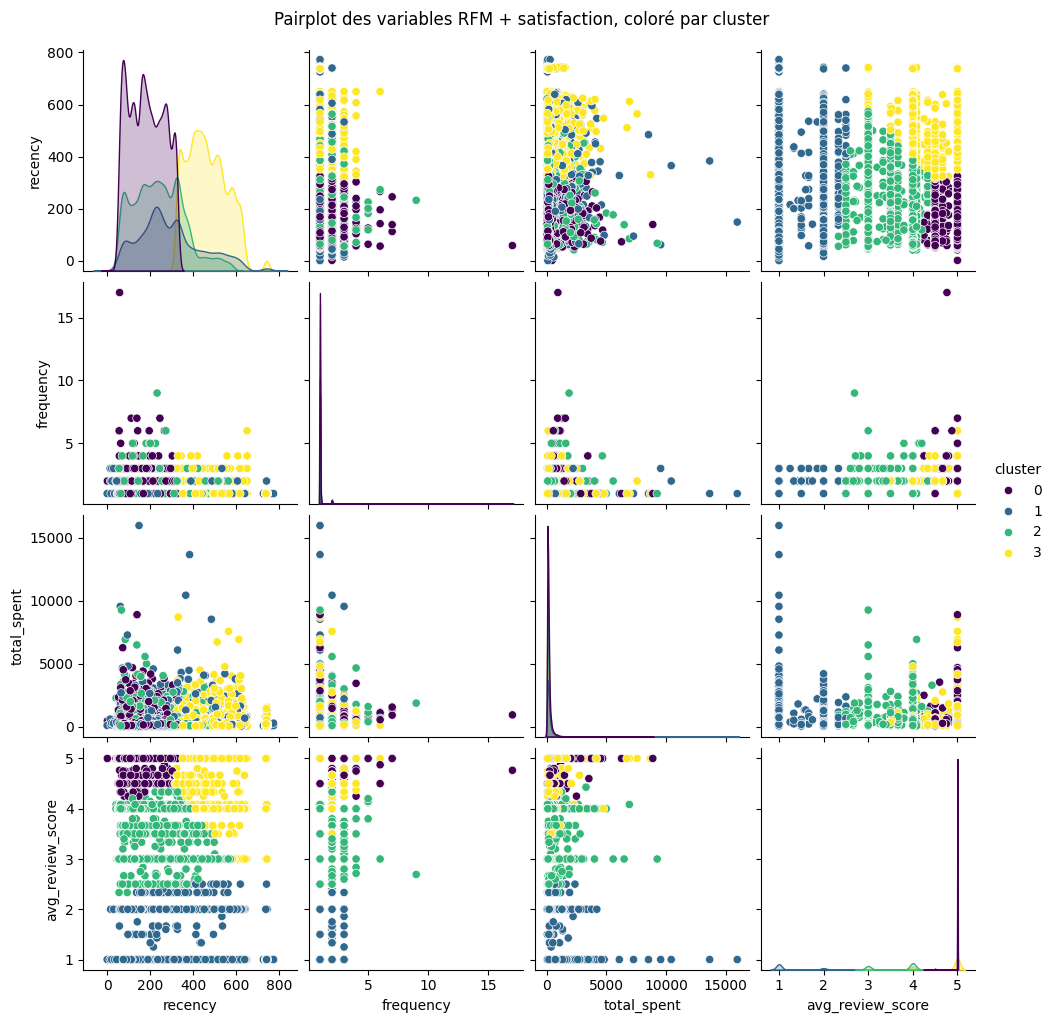

In [ ]:
# Pairplot pour explorer les relations entre RFM + avg_review_score
sns.pairplot(
    df,
    vars=['recency', 'frequency', 'total_spent', 'avg_review_score'],
    hue='cluster',
    palette='viridis',
    diag_kind='kde'
)
plt.suptitle(
    'Pairplot des variables RFM + satisfaction, coloré par cluster',
    y=1.02
)
plt.show()

## 7.3. <a id='toc7_3_'></a>[Analyse des résultats et besoin d'une PCA](#toc0_)

Nous avons appliqué **K-Means** avec **K = 4**, en utilisant les variables **RFM** ainsi que le **score moyen des avis** (**avg_review_score**). Voici ce que nous pouvons observer sur les graphiques :

### 7.3.1. <a id='toc7_3_1_'></a>[Observations :](#toc0_)
- Le **scatter plot** (récence vs montant dépensé) montre une certaine répartition des clusters, mais il reste difficile d'identifier des sous-groupes clairs ou des tendances marquées dans les données.
- Le **pairplot** (RFM + avg_review_score) apporte une vue plus détaillée des relations entre les différentes variables, mais la segmentation reste floue. Il est difficile de déduire des conclusions précises concernant les différences entre les clusters à partir de ce graphique seul.

### 7.3.2. <a id='toc7_3_2_'></a>[Conclusion :](#toc0_)
Puisque la segmentation obtenue n'est pas suffisamment claire avec ces visualisations, nous allons utiliser une **Analyse en Composantes Principales** (**PCA**) pour réduire la dimensionnalité et obtenir une visualisation plus nette des clusters dans un espace à 2 dimensions. Cette approche nous permettra d'explorer plus en profondeur la structure des groupes identifiés par **K-Means** et de mieux comprendre les différences entre les clusters.

In [23]:
# Appliquer la PCA pour réduire les dimensions à 2 après le K-means
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_rfm_avg_review_scaled)

# Ajouter les composantes principales au DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

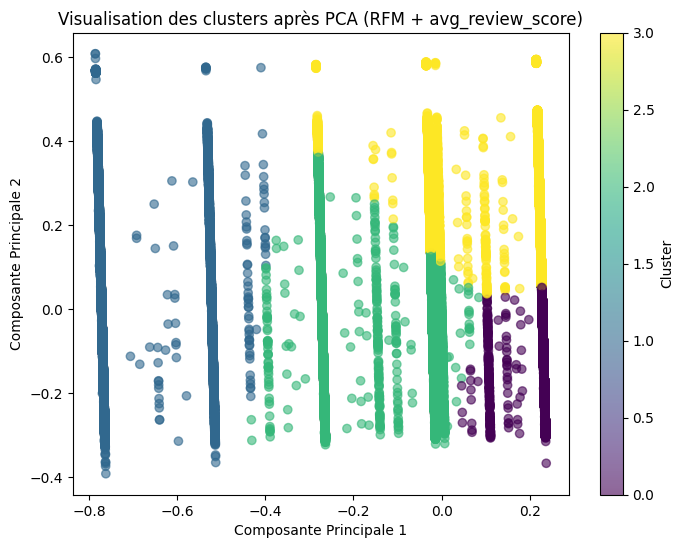

In [24]:
# Tracer les clusters dans l'espace 2D réduit (PCA)
plt.figure(figsize=(8, 6))

# Scatter plot avec les clusters colorés
plt.scatter(
    df['PCA1'], df['PCA2'],
    c=df['cluster'], cmap='viridis', alpha=0.6
)

# Ajouter des labels et un titre
plt.title('Visualisation des clusters après PCA (RFM + avg_review_score)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

# Afficher une barre de couleur pour les clusters
plt.colorbar(label='Cluster')

# Afficher le graphique
plt.show()

In [25]:
# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_
print(
    f"Variance expliquée par la première composante principale : "
    f"{explained_variance[0]:.2f}"
)
print(
    f"Variance expliquée par la deuxième composante principale : "
    f"{explained_variance[1]:.2f}"
)

Variance expliquée par la première composante principale : 0.74
Variance expliquée par la deuxième composante principale : 0.26


cluster
0    34314
1    13916
2    21825
3    26040
Name: count, dtype: int64


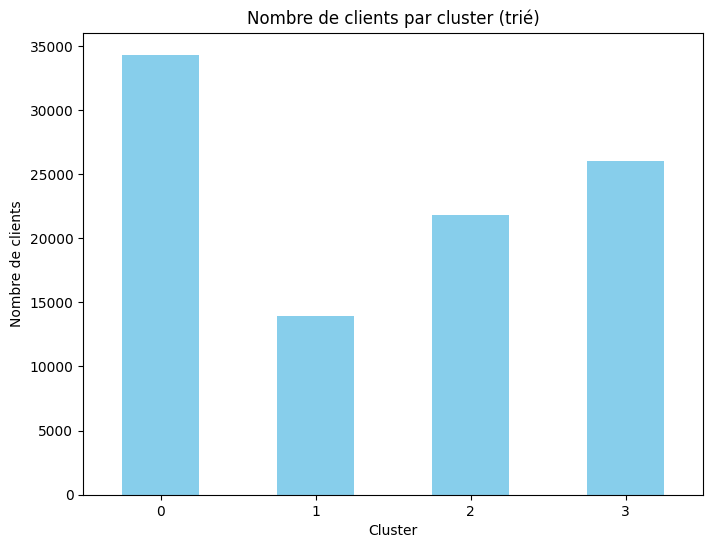

In [ ]:
# Compter le nombre de clients dans chaque cluster
cluster_counts = df['cluster'].value_counts()

# Réorganiser les clusters par ordre numérique croissant
cluster_counts_sorted = cluster_counts.sort_index()
print(cluster_counts_sorted)

# Créer un graphique à barres pour visualiser
# la répartition des clients par cluster (triée)
plt.figure(figsize=(8, 6))
cluster_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Nombre de clients par cluster (trié)')
plt.xlabel('Cluster')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=0)
plt.show()

## 7.4. <a id='toc7_4_'></a>[Observations après la PCA](#toc0_)

L'analyse en **Composantes Principales** (**PCA**) a permis de projeter les clusters obtenus dans un espace à 2 dimensions, capturant **74% de la variance** dans la première composante principale et **26%** dans la deuxième. Grâce à cette visualisation, nous pouvons mieux comprendre la répartition des clients en fonction de leurs comportements d'achat et de leur satisfaction.

### 7.4.1. <a id='toc7_4_1_'></a>[Interprétation des clusters (avec nombre de clients) :](#toc0_)
En ajoutant les informations sur le **nombre de clients dans chaque cluster**, nous pouvons affiner nos observations et prioriser les actions :

1. **Cluster 0 (bleu) - 34,314 clients** :
   - Ce groupe regroupe les clients les plus **satisfaits**, avec un score moyen de **4.99**, et une récence de **182 jours** en moyenne.
   - Ces clients dépensent un peu moins (**167.03**) mais représentent une large part de la base client. Ils sont à **fidéliser** pour augmenter leur panier moyen.

2. **Cluster 1 (jaune) - 13,916 clients** :
   - Bien que ce groupe présente le **meilleur montant dépensé moyen** (**223.36**), leur **satisfaction est très faible** (score de **1.22**).
   - Ce groupe est **à risque**, avec un fort potentiel de **churn** si aucune action n’est entreprise pour améliorer leur expérience. Ils représentent un segment prioritaire à cibler.

3. **Cluster 2 (vert) - 21,825 clients** :
   - Ce cluster regroupe des clients avec une **satisfaction intermédiaire** (**3.65**) et un montant dépensé moyen de **172.37**.
   - Ces clients représentent une **opportunité d’optimisation**, en cherchant à améliorer leur satisfaction pour les pousser à dépenser davantage.

4. **Cluster 3 (violet) - 26,040 clients** :
   - Ces clients sont parmi les plus **anciens** avec une récence moyenne de **463 jours**, mais sont tout de même très **satisfaits** (score de **4.77**).
   - Ce groupe pourrait être **réactivé** via des campagnes marketing ciblées, car ils conservent une bonne opinion de l’entreprise malgré leur inactivité.

### 7.4.2. <a id='toc7_4_2_'></a>[Conclusion :](#toc0_)
L'ajout du **nombre de clients** dans chaque cluster permet d’affiner l’analyse. Le **cluster jaune** (Cluster 1), bien que plus petit, représente un segment à risque qui mérite une attention particulière en raison de sa faible satisfaction. Le **cluster bleu** (Cluster 0), avec son grand nombre de clients, est une opportunité à exploiter pour augmenter le panier moyen des clients très satisfaits. Cette segmentation permet de mieux **prioriser** les actions marketing à entreprendre pour maximiser l'impact sur la base de clients.

## 7.5. <a id='toc7_5_'></a>[Visualisation des clusters avec les variables RFM et le score de satisfaction](#toc0_)

Après avoir appliqué le **K-Means** en intégrant les variables **RFM** et le **score moyen des avis clients** (**avg_review_score**), nous souhaitons maintenant visualiser les résultats obtenus grâce à des **Radar Plots**. Ces graphiques permettent de représenter de manière claire et intuitive les différences entre les clusters en termes de **récence**, **fréquence**, **montant total dépensé** et **satisfaction**.

Nous commencerons par visualiser tous les clusters sur un radar commun, puis nous examinerons chaque cluster séparément pour mieux interpréter les comportements et tendances spécifiques à chaque groupe.

In [27]:
# Calculer les moyennes des données non normalisées
# pour chaque cluster avec avg_review_score
cluster_stats_rfm_review = df.groupby('cluster')[
    ['recency', 'frequency', 'total_spent', 'avg_review_score']
].mean()

# Afficher les statistiques moyennes pour chaque cluster
cluster_stats_rfm_review

,recency,frequency,total_spent,avg_review_score
cluster,,,,
0,182.781446,1.038672,167.033119,4.996734
1,294.938709,1.025079,223.360598,1.224858
2,239.947515,1.040962,172.373873,3.646505
3,463.942107,1.029762,172.096582,4.778721


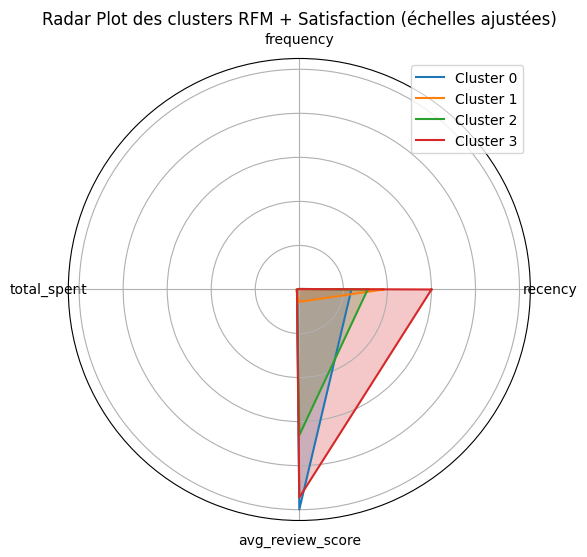

In [28]:
# Calculer les moyennes des données normalisées
# pour chaque cluster (incluant avg_review_score)
cluster_stats_rfm_review_normalized = pd.DataFrame(
    X_rfm_avg_review_scaled,
    columns=['recency', 'frequency', 'total_spent', 'avg_review_score']
).groupby(df['cluster']).mean()

# Préparer le radar plot pour tous les clusters
categories = ['recency', 'frequency', 'total_spent', 'avg_review_score']
N = len(categories)

# Créer l'angle pour chaque catégorie du radar plot
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Boucler sur chaque cluster pour tracer les graphiques radar
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i in range(len(cluster_stats_rfm_review_normalized)):
    values = cluster_stats_rfm_review_normalized.iloc[i].values.flatten()
    values = values.tolist()
    values += values[:1]  # Fermer le cercle

    ax.fill(angles, values, alpha=0.25)
    ax.plot(angles, values, label=f'Cluster {i}')

# Ajouter les labels et le titre
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Radar Plot des clusters RFM + Satisfaction (échelles ajustées)')
plt.legend(loc='upper right')
plt.show()

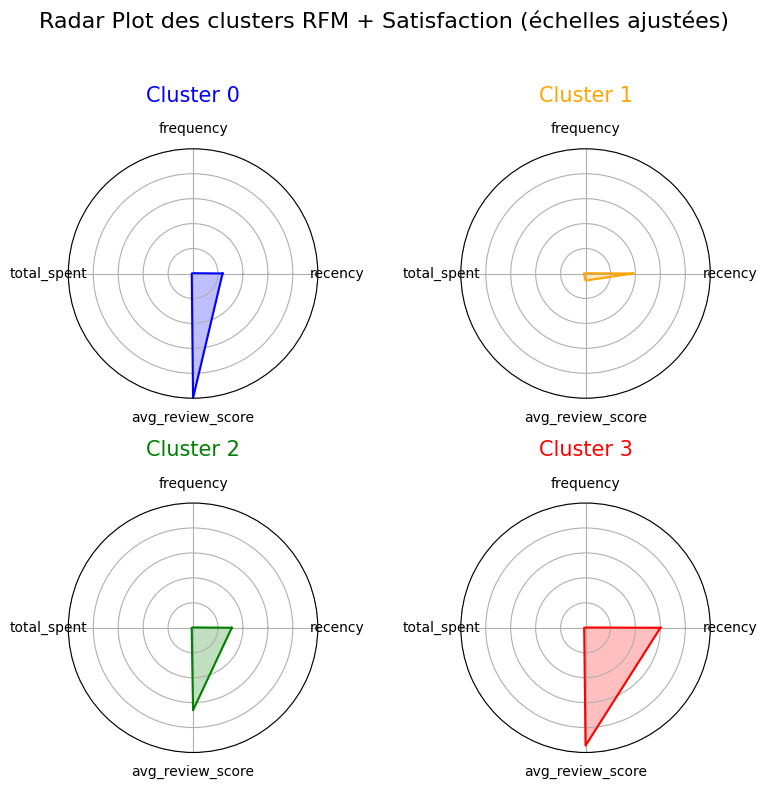

In [ ]:
# Fonction pour tracer les radar plots pour chaque cluster séparément
def radar_plot_individual_clusters(cluster_means, categories, title):
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, axs = plt.subplots(2, 2, figsize=(8, 8), subplot_kw=dict(polar=True))

    # Couleurs pour chaque cluster
    colors = ['b', 'orange', 'g', 'r']

    for i, ax in enumerate(axs.flat):
        cluster_data = cluster_means.iloc[i].values.flatten()
        cluster_data = cluster_data.tolist()
        cluster_data += cluster_data[:1]  # Fermer le radar plot

        # Tracer le radar plot pour chaque cluster
        ax.fill(angles, cluster_data, color=colors[i], alpha=0.25)
        ax.plot(angles, cluster_data, color=colors[i], label=f'Cluster {i}')

        # Ajouter les labels et le titre du radar plot pour chaque cluster
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)
        ax.set_yticklabels([])
        ax.set_title(f'Cluster {i}', color=colors[i], size=15, pad=15)
        ax.set_ylim(0, 1)

    plt.suptitle(title, size=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Appel de la fonction avec les catégories et les données normalisées
categories = ['recency', 'frequency', 'total_spent', 'avg_review_score']

radar_plot_individual_clusters(
    cluster_stats_rfm_review_normalized,
    categories,
    "Radar Plot des clusters RFM + Satisfaction (échelles ajustées)"
)

## 7.6. <a id='toc7_6_'></a>[Analyse des résultats : Clustering avec les variables RFM et Satisfaction](#toc0_)

### 7.6.1. <a id='toc7_6_1_'></a>[Interprétation des Radar Plots](#toc0_)
Les **Radar Plots** nous permettent de visualiser comment chaque cluster se comporte par rapport aux variables **RFM** et le **score de satisfaction** (moyenne des avis). Voici les principales observations à retenir :

- **Cluster 0** : Ce groupe se caractérise par une **récence** faible, signifiant que ces clients ont passé des commandes relativement récentes. Ils ont également un très haut **score de satisfaction** moyen (presque 5). Ce sont donc probablement des clients **fidèles** et **satisfaits**, même si leur **montant total dépensé** n'est pas particulièrement élevé.

- **Cluster 1** : Ce cluster se distingue par un **montant total dépensé** beaucoup plus élevé que les autres, mais leur **satisfaction** est extrêmement basse (1.22). Ce groupe pourrait correspondre à des clients insatisfaits malgré leur niveau d'achat élevé, ce qui pourrait représenter un **risque de churn** (perte de clients).

- **Cluster 2** : Ce groupe présente des valeurs relativement **moyennes** sur la plupart des dimensions, avec un **score de satisfaction modéré** (3.65). Ces clients n'ont pas de caractéristiques extrêmement marquées, ce qui les place probablement dans un groupe intermédiaire en termes de satisfaction et de comportement d'achat.

- **Cluster 3** : Les clients de ce cluster ont une **récence** très élevée, ce qui signifie qu'ils n'ont pas effectué de commandes récentes. Cependant, leur **satisfaction** est également très élevée (4.78). Ce groupe peut représenter des clients **loyaux**, mais qui n'ont pas acheté depuis un certain temps. Une stratégie de **réengagement** pourrait être utile pour les ramener à passer commande.

### 7.6.2. <a id='toc7_6_2_'></a>[Interprétation du tableau des moyennes par cluster](#toc0_)
Le tableau ci-dessus confirme les observations faites avec les **Radar Plots**. Nous observons notamment que :

- Le **Cluster 0** a la **meilleure satisfaction**, et ces clients sont relativement récents (182 jours en moyenne), ce qui en fait une cible idéale pour des stratégies de **fidélisation**.
  
- Le **Cluster 1**, bien qu'ayant dépensé **plus de 223** en moyenne, se démarque par sa **très faible satisfaction**. Cela montre que des clients peuvent être **grands dépensiers** tout en étant insatisfaits, ce qui représente une **opportunité d'amélioration** des services pour éviter de perdre ces clients importants.

- Les **Cluster 2** et **Cluster 3** présentent des comportements opposés en termes de récence, mais le **Cluster 3**, bien que moins actif, montre une satisfaction élevée. Cela suggère une opportunité de **réactiver ces clients** avec des stratégies appropriées.

### 7.6.3. <a id='toc7_6_3_'></a>[Conclusion](#toc0_)
Ces analyses nous montrent que le **score de satisfaction** est une variable cruciale pour segmenter les clients de manière plus fine. Le **Cluster 1** en particulier nécessite une attention particulière pour améliorer leur satisfaction, tandis que les **Cluster 0** et **Cluster 3** sont des groupes à **consolider** ou à **réengager**. L'ajout du score de satisfaction dans notre analyse a permis d'identifier des **insights** plus précis sur les besoins des différents segments de clients.

# 8. <a id='toc8_'></a>[Troisième K-Means : RFM + Satisfaction + Méthodes de Paiement](#toc0_)

Dans cette partie, nous allons appliquer à nouveau l'algorithme de **K-Means**, en ajoutant cette fois les **méthodes de paiement** utilisées par les clients, en plus des variables **RFM** (Récence, Fréquence, Montant Total) et du **score moyen des avis**. 

L'objectif est de voir si l'inclusion de ces informations supplémentaires permet de mieux **segmenter** les clients selon leurs comportements d'achat et leurs préférences en termes de **paiement**. En comprenant quelles méthodes de paiement sont privilégiées par chaque cluster, nous pourrions par exemple identifier des **patterns** spécifiques parmi les clients à forte dépense, ou découvrir si certaines méthodes sont associées à des scores de satisfaction plus élevés.

Comme dans les approches précédentes, nous commencerons par :
- **Normaliser** les variables numériques (RFM et satisfaction),
- Ajouter les **méthodes de paiement** binaires encodées,
- Puis nous déterminerons le nombre optimal de clusters avec la **méthode du coude** et le **Silhouette Score** avant d'appliquer le **K-Means** final.

Nous utiliserons les mêmes méthodes de visualisation que pour les K-Means précédents, notamment des **scatter plots**, des **pairplots**, une **PCA** pour mieux visualiser les clusters, et des **Radar Plots** pour analyser les caractéristiques de chaque groupe.

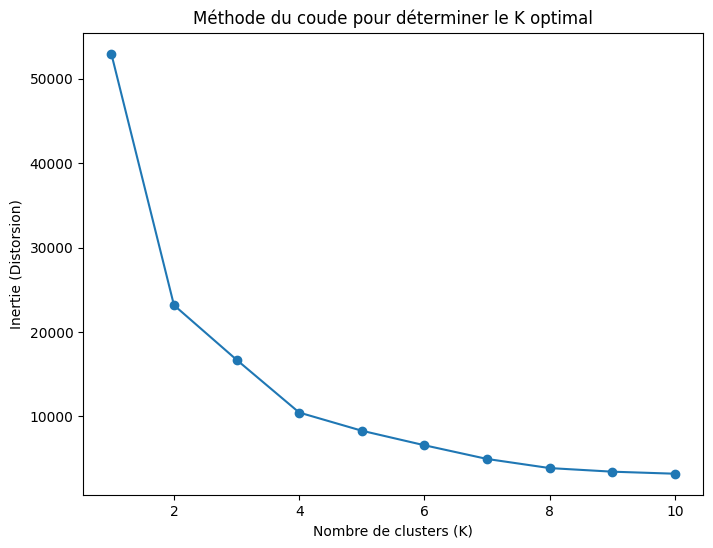

In [30]:
# Normaliser les colonnes RFM + avg_review_score
scaler = MinMaxScaler()
X_rfm_review_payment = scaler.fit_transform(
    df[['recency', 'frequency', 'total_spent', 'avg_review_score']]
)

# Ajouter les colonnes des méthodes de paiement encodées
X_payment_methods = df[
    ['payment_methods_boleto', 'payment_methods_credit_card',
     'payment_methods_debit_card', 'payment_methods_not_defined',
     'payment_methods_voucher']
].values

# Combiner les deux matrices (RFM + review score et méthodes de paiement)
X_combined = np.hstack([X_rfm_review_payment, X_payment_methods])

# Méthode du coude pour déterminer le K optimal
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_combined)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 6))
plt.plot(
    range(1, 11), inertia,
    marker='o'
)
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie (Distorsion)')
plt.title('Méthode du coude pour déterminer le K optimal')
plt.show()

Pour K = 2, le Silhouette Score moyen est : 0.6375016091890097
Pour K = 3, le Silhouette Score moyen est : 0.6842559026043273
Pour K = 4, le Silhouette Score moyen est : 0.6208369961300895
Pour K = 5, le Silhouette Score moyen est : 0.6370247791746914
Pour K = 6, le Silhouette Score moyen est : 0.503122848900111
Pour K = 7, le Silhouette Score moyen est : 0.48974948696059434
Pour K = 8, le Silhouette Score moyen est : 0.520068537107783
Pour K = 9, le Silhouette Score moyen est : 0.49473295677084644
Pour K = 10, le Silhouette Score moyen est : 0.5018718862555103


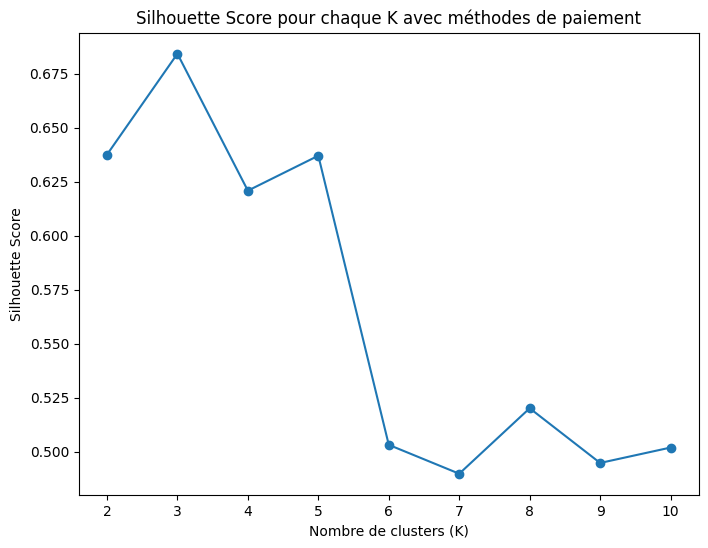

In [ ]:
# Calcul du Silhouette Score pour chaque K
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_combined)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_combined, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Pour K = {k}, le Silhouette Score moyen est : {silhouette_avg}")

# Tracer le graphique du Silhouette Score pour chaque K
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score pour chaque K avec méthodes de paiement')
plt.show()

## 8.1. <a id='toc8_1_'></a>[Choix du nombre de clusters : 4](#toc0_)

Après avoir examiné les résultats de la **méthode du coude** et du **Silhouette Score**, nous avons opté pour **K = 4** clusters.

- **Méthode du coude** : Le graphique montre un point d'inflexion clair autour de **K = 4**, ce qui suggère que l'ajout de clusters supplémentaires après ce point n'améliore plus de manière significative la réduction de l'inertie (distorsion). Cela indique que **4 clusters** représente un bon compromis entre la complexité du modèle et la qualité des regroupements.

- **Silhouette Score** : Bien que le score maximal soit atteint pour **K = 3** avec un **Silhouette Score de 0.68**, nous avons choisi **K = 4** pour maintenir la cohérence avec les autres analyses et observer l'impact des **méthodes de paiement** sur un plus grand nombre de clusters. Le **Silhouette Score de 0.62** pour **K = 4** reste suffisamment élevé pour garantir des clusters bien séparés et cohérents.

En conclusion, **K = 4** est un choix pertinent pour analyser l'impact des méthodes de paiement, tout en maintenant un bon compromis entre performance et complexité.

In [32]:
# Appliquer K-Means avec le K optimal (par exemple, K = 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_payment'] = kmeans.fit_predict(X_combined)

# Afficher les statistiques moyennes par cluster
categories = [
    'recency', 'frequency', 'total_spent', 'avg_review_score',
    'payment_methods_boleto', 'payment_methods_credit_card',
    'payment_methods_debit_card', 'payment_methods_not_defined',
    'payment_methods_voucher'
]

cluster_stats_combined = df.groupby('cluster_payment')[categories].mean()
cluster_stats_combined

,recency,frequency,total_spent,avg_review_score,payment_methods_boleto,payment_methods_credit_card,payment_methods_debit_card,payment_methods_not_defined,payment_methods_voucher
cluster_payment,,,,,,,,,
0,277.298582,1.053413,155.650927,4.057005,0.0,0.000000,0.290976,0.000193,0.708831
1,285.226487,1.036857,176.295967,4.574022,0.0,1.000000,0.000000,0.000000,0.000000
2,298.296450,1.026472,159.853845,4.084808,1.0,0.000000,0.000000,0.000000,0.000000
3,292.644346,1.028746,229.992947,1.229611,0.0,0.999809,0.000000,0.000191,0.000000


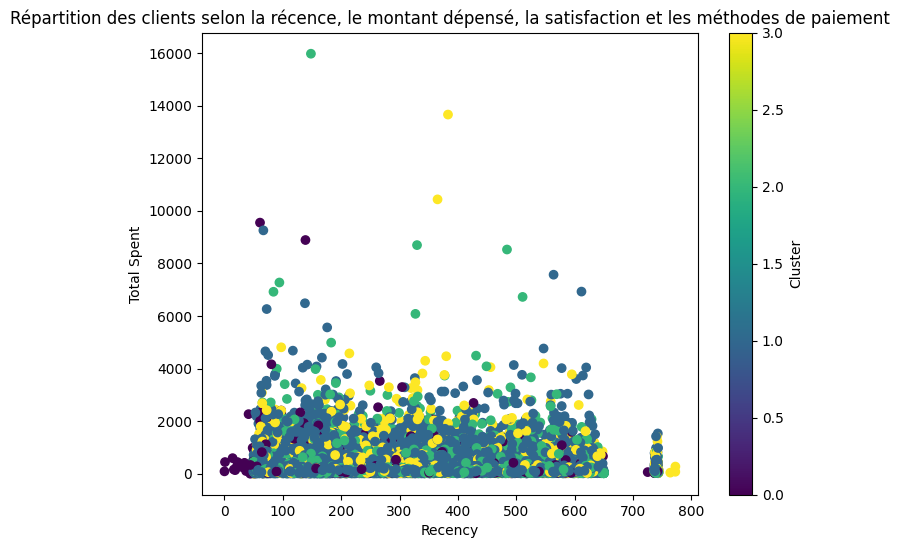

In [33]:
# Visualisation : Scatter plot pour recency vs total_spent
plt.figure(figsize=(8, 6))
plt.scatter(
    df['recency'], df['total_spent'],
    c=df['cluster_payment'], cmap='viridis'
)
plt.xlabel('Recency')
plt.ylabel('Total Spent')
plt.title(
    'Répartition des clients selon la récence, le montant dépensé, '
    'la satisfaction et les méthodes de paiement'
)
plt.colorbar(label='Cluster')
plt.show()

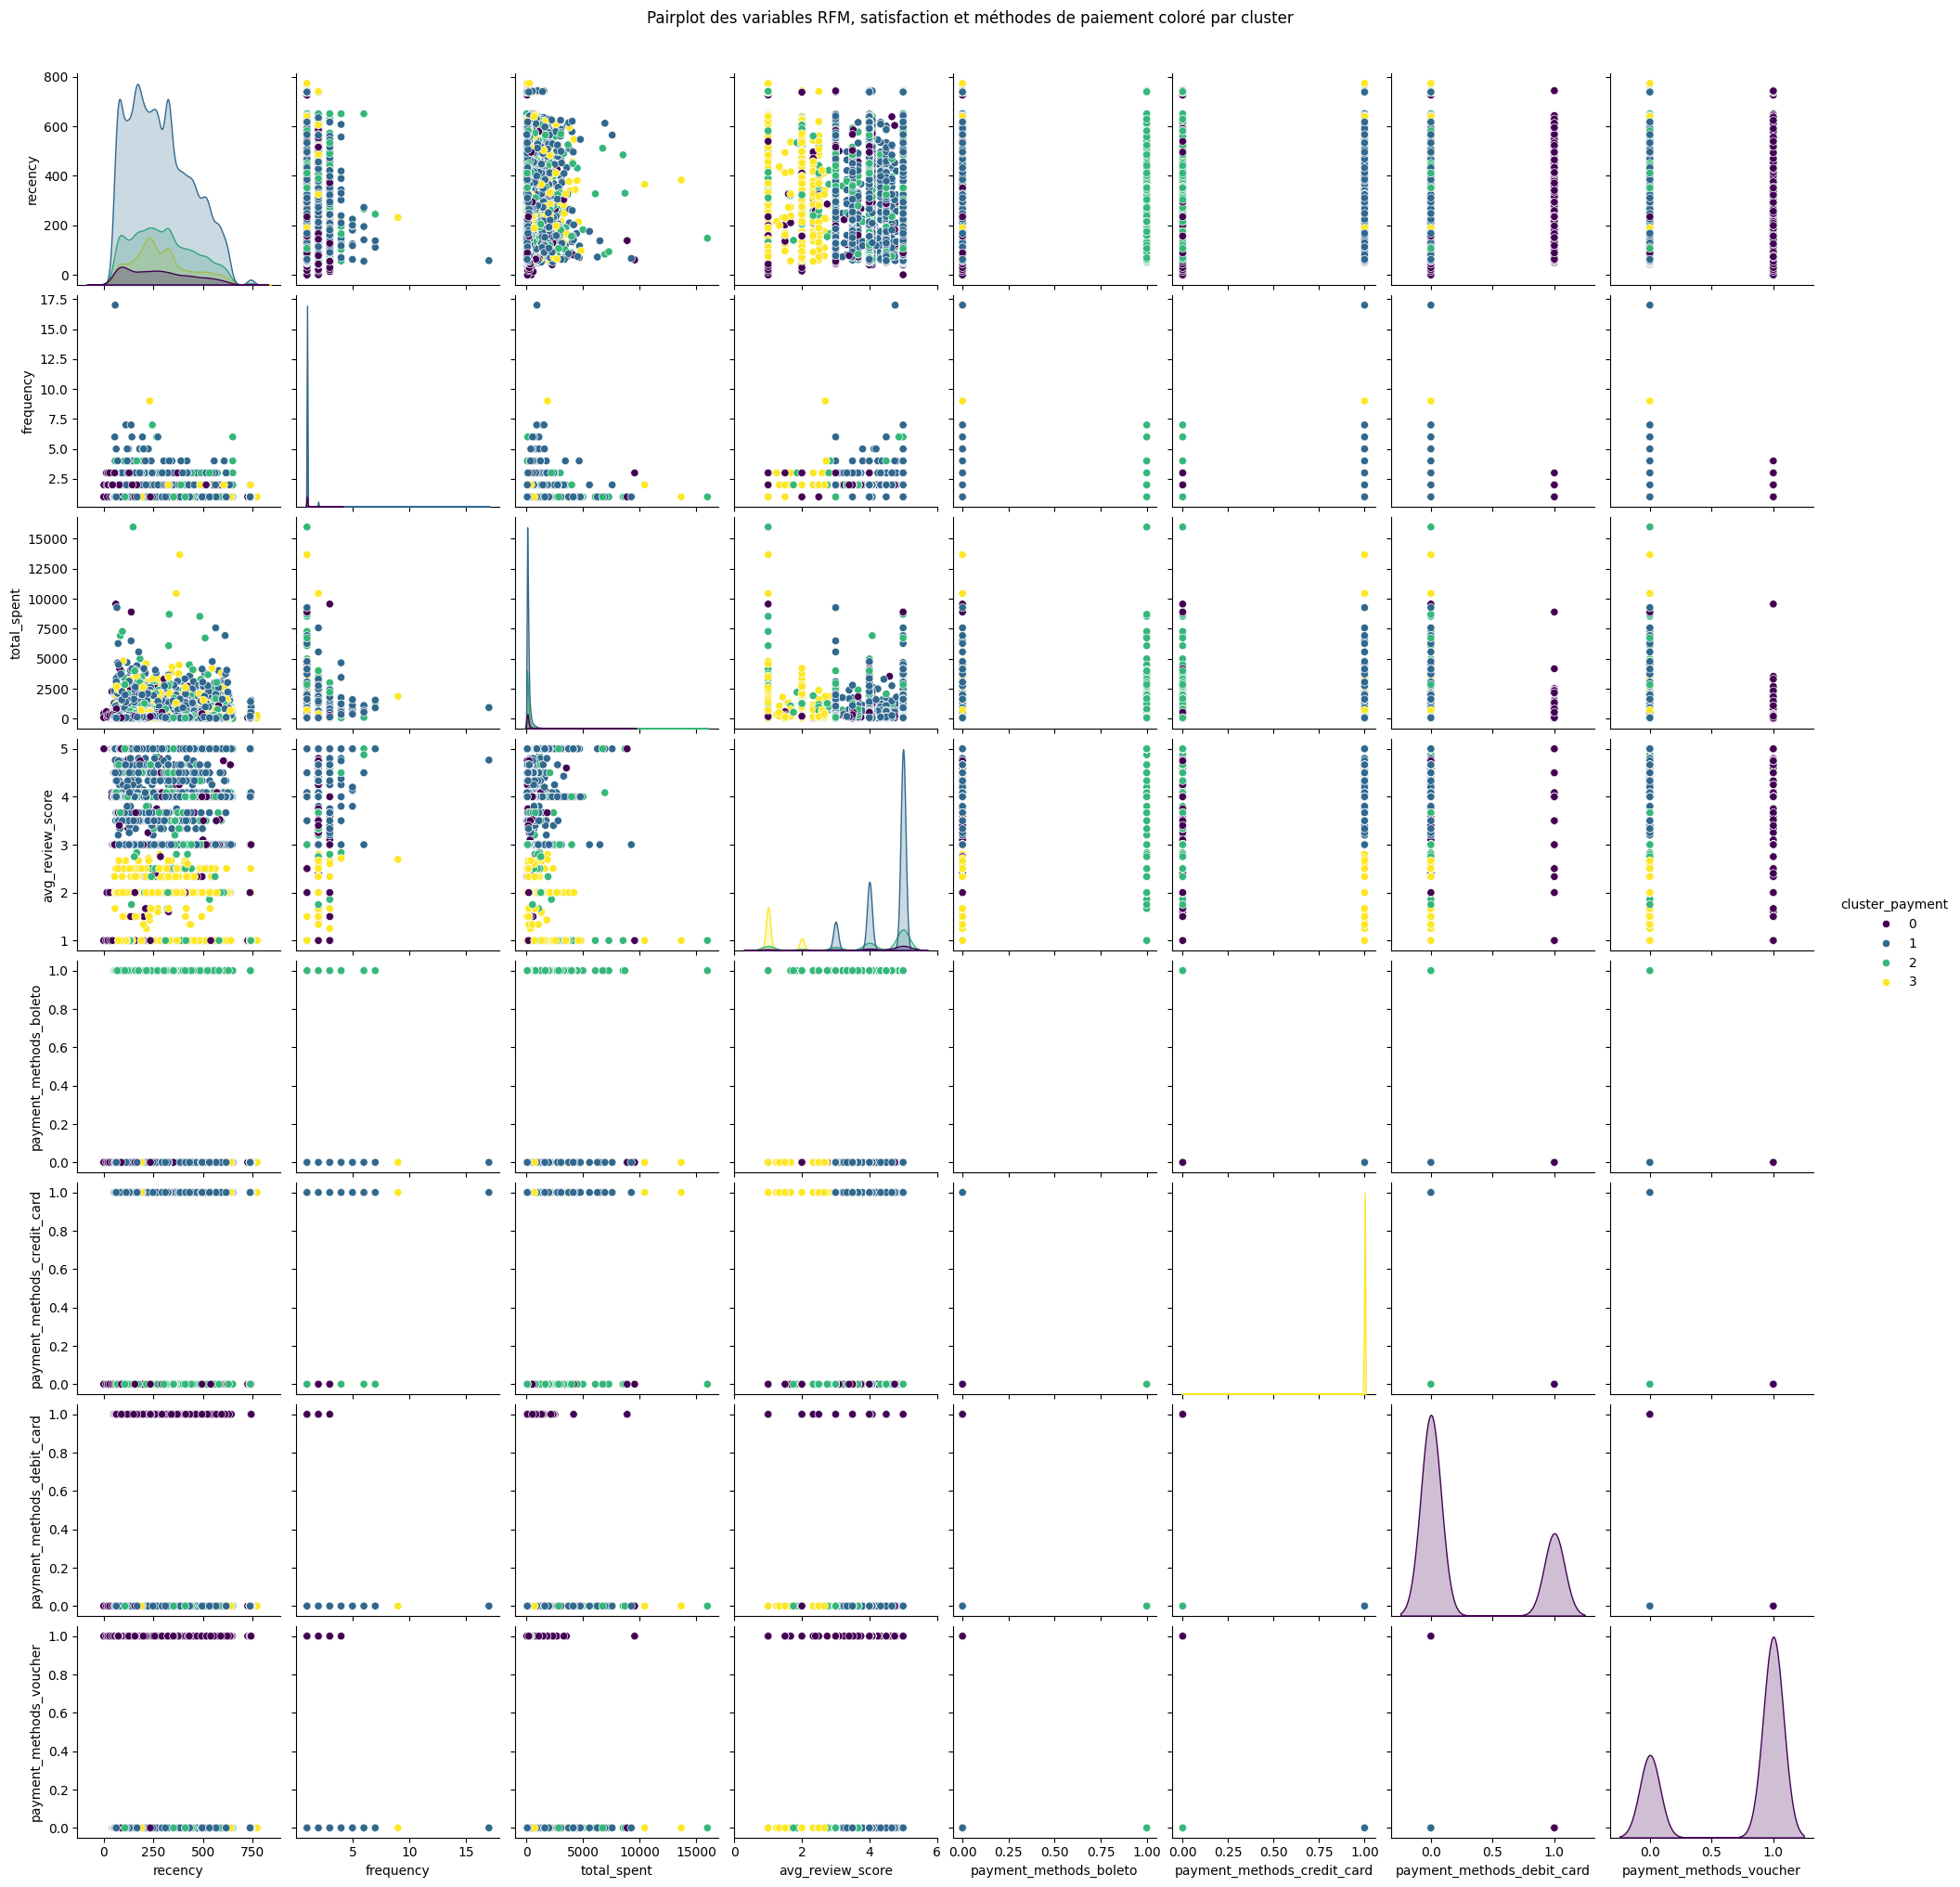

In [ ]:
# Sélectionner les variables RFM, score de satisfaction,
# et méthodes de paiement pour le pairplot
variables = [
    'recency', 'frequency', 'total_spent', 'avg_review_score',
    'payment_methods_boleto', 'payment_methods_credit_card',
    'payment_methods_debit_card', 'payment_methods_voucher'
]

# Créer le pairplot avec les clusters colorés
sns.pairplot(
    df, vars=variables,
    hue='cluster_payment', palette='viridis', diag_kind='kde'
)
plt.suptitle(
    'Pairplot des variables RFM, satisfaction et méthodes de paiement '
    'coloré par cluster',
    y=1.02
)
plt.show()

## 8.2. <a id='toc8_2_'></a>[Interprétation des résultats de K-Means avec méthodes de paiement](#toc0_)

Les résultats de ce K-Means, prenant en compte les méthodes de paiement en plus des variables RFM et de la satisfaction (avg_review_score), montrent une segmentation intéressante des clients.

1. **Recency, Frequency et Total Spent** :
   - Les différents clusters n'ont pas de variations significatives au niveau de la récence, la fréquence et le montant total dépensé. Ces variables sont assez similaires à travers les clusters, ce qui peut signifier que les méthodes de paiement et la satisfaction jouent un rôle plus important dans cette segmentation.

2. **Méthodes de paiement** :
   - Le **cluster 1** regroupe exclusivement des clients qui utilisent **la carte de crédit**.
   - Le **cluster 2** est composé de clients utilisant majoritairement le **boleto bancaire**.
   - Les **clusters 0 et 3** montrent une utilisation plus diversifiée des méthodes de paiement, avec une forte utilisation des **vouchers** pour le cluster 0 et des cartes de crédit pour le cluster 3.

3. **Satisfaction (avg_review_score)** :
   - Le **cluster 3** regroupe des clients qui ont donné les **scores les plus bas** en termes de satisfaction (en moyenne 1,23), tandis que les autres clusters montrent des scores de satisfaction plus élevés, en particulier dans le **cluster 1**.

Cependant, malgré ces observations, les graphiques actuels ne permettent pas de visualiser clairement les différences entre les clusters. C'est pourquoi nous allons appliquer une **PCA (Analyse en Composantes Principales)** pour réduire les dimensions et obtenir une **meilleure visualisation** des clusters.

In [35]:
# Appliquer la PCA pour réduire les dimensions à 3
pca = PCA(n_components=3)
X_pca_payment_3d = pca.fit_transform(X_combined)

# Ajouter les composantes principales au DataFrame
df['PCA1_payment'] = X_pca_payment_3d[:, 0]
df['PCA2_payment'] = X_pca_payment_3d[:, 1]
df['PCA3_payment'] = X_pca_payment_3d[:, 2]

# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_
print(
    f"Variance expliquée par la première composante principale : "
    f"{explained_variance[0]:.2f}"
)
print(
    f"Variance expliquée par la deuxième composante principale : "
    f"{explained_variance[1]:.2f}"
)
print(
    f"Variance expliquée par la troisième composante principale : "
    f"{explained_variance[2]:.2f}"
)

Variance expliquée par la première composante principale : 0.59
Variance expliquée par la deuxième composante principale : 0.20
Variance expliquée par la troisième composante principale : 0.10


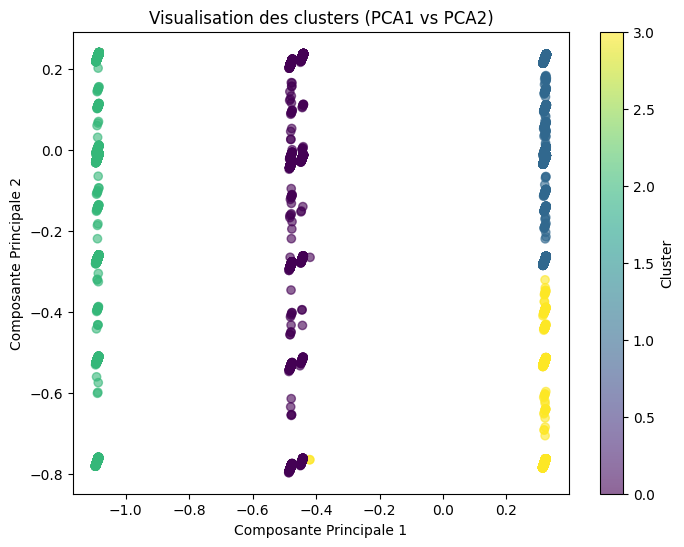

In [36]:
# Visualisation PCA1 vs PCA2
plt.figure(figsize=(8, 6))
plt.scatter(
    df['PCA1_payment'], df['PCA2_payment'],
    c=df['cluster_payment'], cmap='viridis', alpha=0.6
)
plt.title('Visualisation des clusters (PCA1 vs PCA2)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.colorbar(label='Cluster')
plt.show()

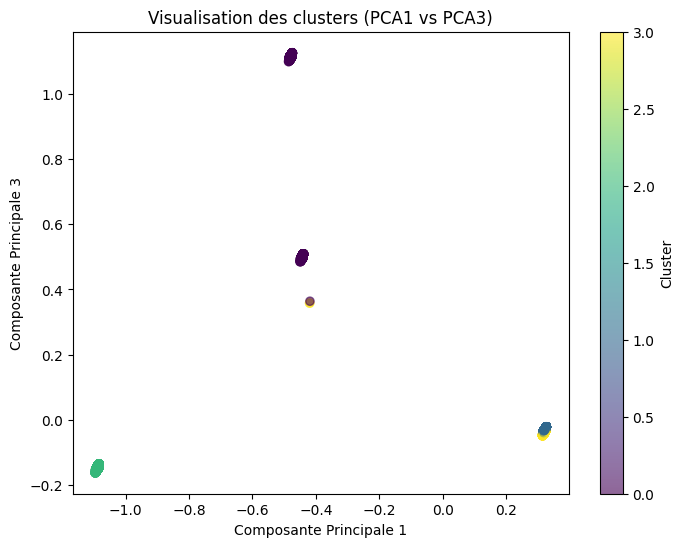

In [37]:
# Visualisation PCA1 vs PCA3
plt.figure(figsize=(8, 6))
plt.scatter(
    df['PCA1_payment'], df['PCA3_payment'],
    c=df['cluster_payment'], cmap='viridis', alpha=0.6
)
plt.title('Visualisation des clusters (PCA1 vs PCA3)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 3')
plt.colorbar(label='Cluster')
plt.show()

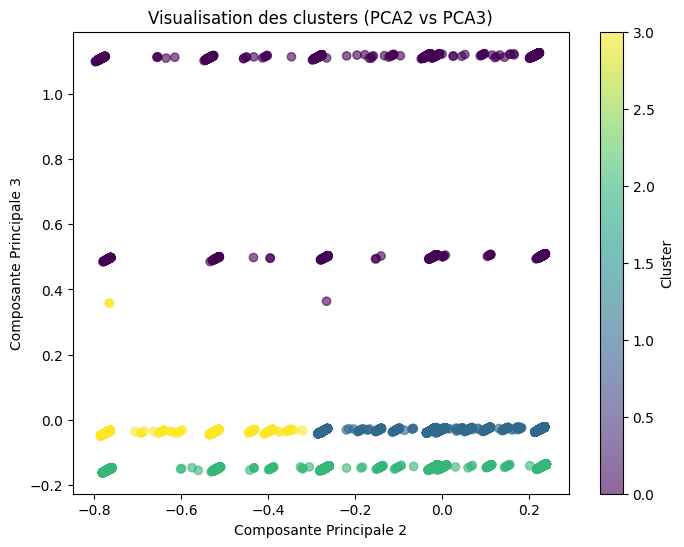

In [38]:
# Visualisation PCA2 vs PCA3
plt.figure(figsize=(8, 6))
plt.scatter(
    df['PCA2_payment'], df['PCA3_payment'],
    c=df['cluster_payment'], cmap='viridis', alpha=0.6
)
plt.title('Visualisation des clusters (PCA2 vs PCA3)')
plt.xlabel('Composante Principale 2')
plt.ylabel('Composante Principale 3')
plt.colorbar(label='Cluster')
plt.show()

cluster_payment
0     5186
1    61399
2    19039
3    10471
Name: count, dtype: int64


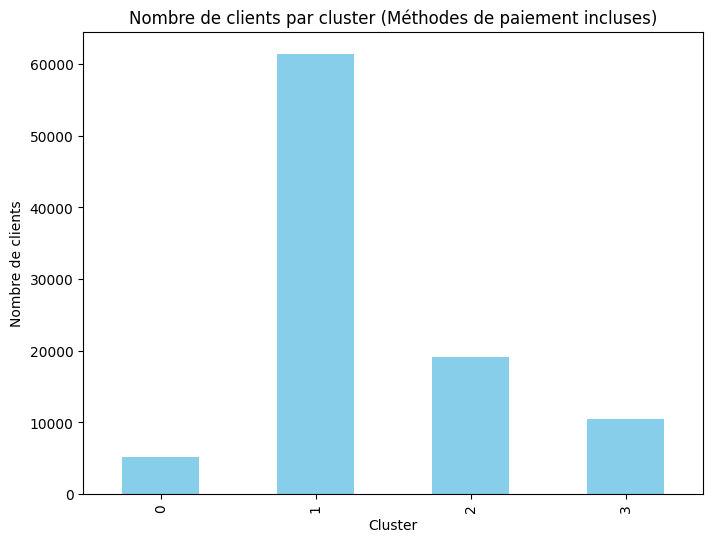

In [ ]:
# Compter le nombre de clients dans chaque cluster après la PCA
# et trier dans l'ordre de 0 à 3
cluster_counts_payment_sorted = (
    df['cluster_payment'].value_counts().sort_index()
)
print(cluster_counts_payment_sorted)

# Visualisation du nombre de clients par cluster
# sous forme de bar plot (ordonné de 0 à 3)
plt.figure(figsize=(8, 6))
cluster_counts_payment_sorted.plot(
    kind='bar', color='skyblue'
)
plt.xlabel('Cluster')
plt.ylabel('Nombre de clients')
plt.title(
    'Nombre de clients par cluster (Méthodes de paiement incluses)'
)
plt.show()

## 8.3. <a id='toc8_3_'></a>[Observations après la PCA](#toc0_)

Après avoir appliqué la **PCA** sur les données **RFM**, les scores de satisfaction et les **méthodes de paiement**, nous avons réduit les dimensions à 3 composantes principales qui expliquent respectivement **59%**, **20%**, et **10%** de la variance totale. Cela nous permet de capturer environ **89%** de l'information avec ces trois composantes.

Les graphiques de la PCA montrent une **bonne distinction** entre les clusters, bien que certains groupes puissent sembler légèrement se superposer. Sur les trois axes (PCA1, PCA2, PCA3), nous pouvons observer une structure distincte pour les clusters, mais elle n'est pas aussi claire que dans les analyses précédentes.

### 8.3.1. <a id='toc8_3_1_'></a>[Répartition des clients par cluster :](#toc0_)
- **Cluster 0** : Le plus petit groupe, avec seulement **5 186** clients, est plus dispersé dans les trois composantes principales. Il semble montrer une variété de méthodes de paiement, ce qui peut refléter une diversité dans les comportements d'achat.
- **Cluster 1** : Regroupe **61 399** clients, ce qui en fait de loin le plus grand cluster. Ce cluster est particulièrement visible dans la composante **PCA1**, influencée par l'utilisation de la carte de crédit et des scores de satisfaction élevés.
- **Cluster 2** : Comprend **19 039** clients. Ce groupe est bien structuré et se distingue par l'utilisation prédominante du **boleto** comme méthode de paiement.
- **Cluster 3** : Plus petit avec **10 471** clients, il présente des scores de satisfaction plus faibles et semble se regrouper distinctement sur la première composante.

### 8.3.2. <a id='toc8_3_2_'></a>[Analyse des composantes principales :](#toc0_)
- **PCA1** est la plus discriminante et est principalement influencée par les méthodes de paiement et les scores de satisfaction. Cela reflète les différences marquées dans les préférences de paiement au sein des clusters.
- **PCA2** et **PCA3** ajoutent des détails sur d'autres variables, mais avec une influence moindre sur la distinction entre les clusters.

### 8.3.3. <a id='toc8_3_3_'></a>[Conclusion :](#toc0_)
Cette **PCA** nous offre une visualisation plus claire des clusters, en tenant compte des **méthodes de paiement**, qui semblent jouer un rôle crucial dans la segmentation des clients. Les différences dans l'utilisation des méthodes de paiement, en particulier l'utilisation exclusive des cartes de crédit et du boleto, contribuent largement à la distinction des clusters.

Nous allons maintenant utiliser des **radar plots** pour examiner plus en détail les différences entre les clusters.

In [40]:
# Calculer les moyennes des données non normalisées
# pour chaque cluster (inclus avg_review_score et méthodes de paiement)
cluster_stats_non_normalized = df.groupby('cluster_payment')[
    [
        'recency', 'frequency', 'total_spent', 'avg_review_score',
        'payment_methods_boleto', 'payment_methods_credit_card',
        'payment_methods_debit_card', 'payment_methods_not_defined',
        'payment_methods_voucher'
    ]
].mean()

# Afficher les statistiques moyennes pour chaque cluster
cluster_stats_non_normalized

,recency,frequency,total_spent,avg_review_score,payment_methods_boleto,payment_methods_credit_card,payment_methods_debit_card,payment_methods_not_defined,payment_methods_voucher
cluster_payment,,,,,,,,,
0,277.298582,1.053413,155.650927,4.057005,0.0,0.000000,0.290976,0.000193,0.708831
1,285.226487,1.036857,176.295967,4.574022,0.0,1.000000,0.000000,0.000000,0.000000
2,298.296450,1.026472,159.853845,4.084808,1.0,0.000000,0.000000,0.000000,0.000000
3,292.644346,1.028746,229.992947,1.229611,0.0,0.999809,0.000000,0.000191,0.000000


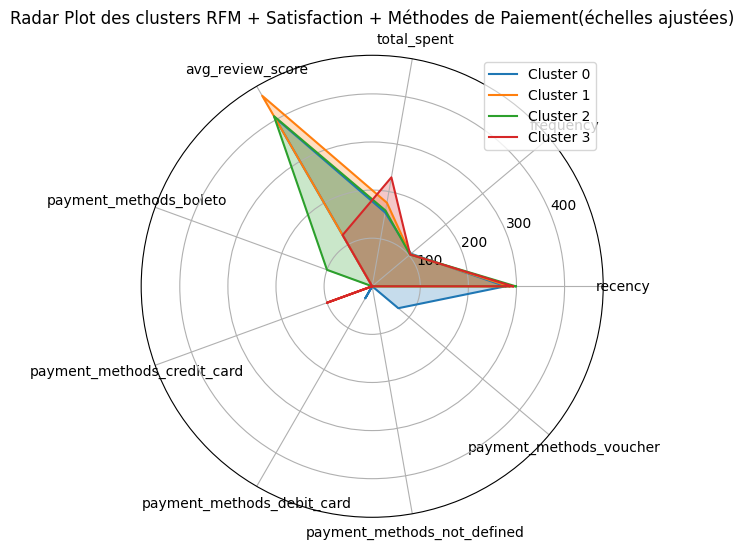

In [41]:
# Appliquer un facteur d'échelle sur 'frequency',
# 'avg_review_score', et les méthodes de paiement
cluster_stats_combined['frequency'] *= 100
cluster_stats_combined['avg_review_score'] *= 100

# Appliquer un facteur d'échelle sur les méthodes de paiement
payment_cols = [
    'payment_methods_boleto', 'payment_methods_credit_card',
    'payment_methods_debit_card', 'payment_methods_not_defined',
    'payment_methods_voucher'
]
cluster_stats_combined[payment_cols] *= 100

N = len(categories)

# Créer l'angle pour chaque catégorie du radar plot
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Boucler sur chaque cluster pour tracer les graphiques radar
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i in range(len(cluster_stats_combined)):
    values = cluster_stats_combined.iloc[i].values.flatten().tolist()
    values += values[:1]  # Fermer le cercle

    ax.fill(angles, values, alpha=0.25)
    ax.plot(angles, values, label=f'Cluster {i}')

# Ajouter les labels et le titre
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title(
    'Radar Plot des clusters RFM + Satisfaction + Méthodes de Paiement'
    '(échelles ajustées)'
)
plt.legend(loc='upper right')
plt.show()

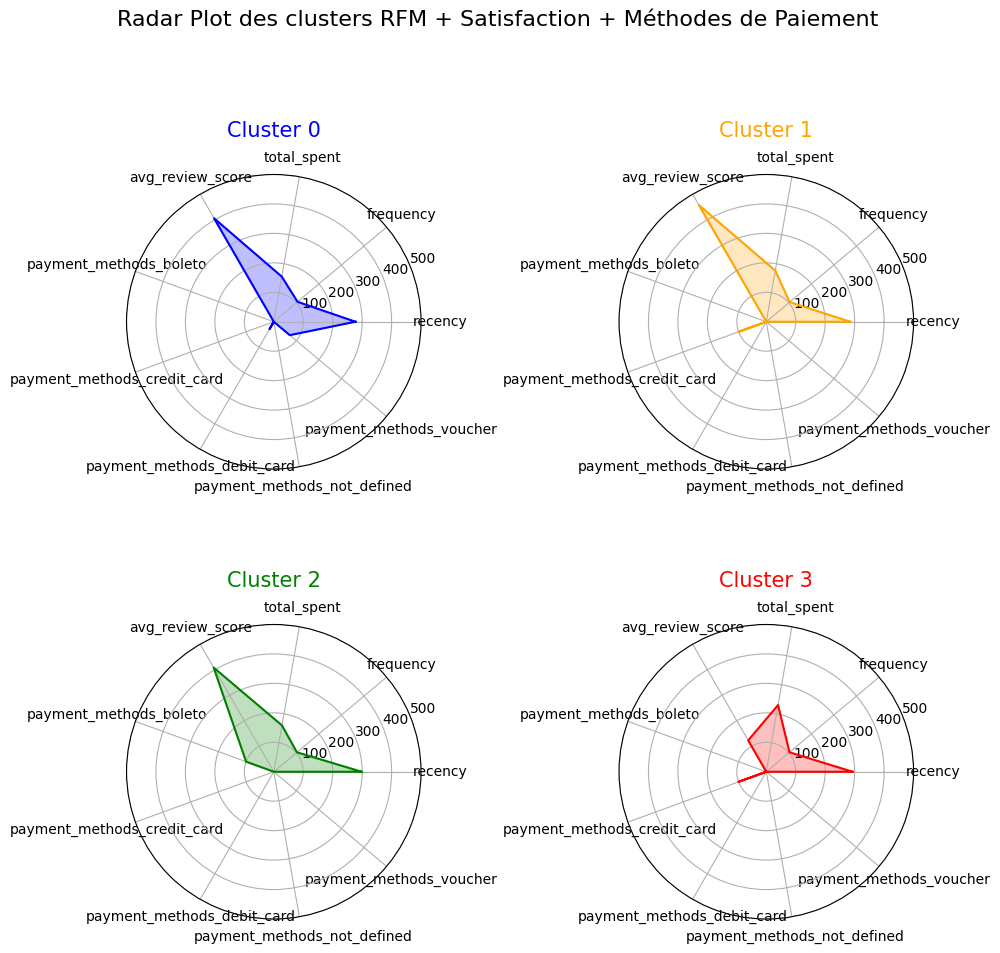

In [ ]:
# Fonction pour tracer les radar plots pour chaque cluster séparément
def radar_plot_individual_clusters(cluster_means, categories, title):
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, axs = plt.subplots(
        2, 2, figsize=(10, 10), subplot_kw=dict(polar=True)
    )

    # Couleurs pour chaque cluster
    colors = ['b', 'orange', 'g', 'r']

    for i, ax in enumerate(axs.flat):
        cluster_data = cluster_means.iloc[i].values.flatten().tolist()
        cluster_data += cluster_data[:1]  # Fermer le radar plot

        # Tracer le radar plot pour chaque cluster
        ax.fill(angles, cluster_data, color=colors[i], alpha=0.25)
        ax.plot(angles, cluster_data, color=colors[i], label=f'Cluster {i}')

        # Ajouter les labels et le titre du radar plot pour chaque cluster
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)
        ax.set_title(f'Cluster {i}', color=colors[i], size=15, pad=10)

        # Ajuster l'échelle des axes radiaux pour montrer toute la figure
        ax.set_ylim(0, 500)

    plt.suptitle(
        title, size=16
    )
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Appel de la fonction avec les catégories et les données normalisées
radar_plot_individual_clusters(
    cluster_stats_combined, categories,
    "Radar Plot des clusters RFM + Satisfaction + Méthodes de Paiement"
)

## 8.4. <a id='toc8_4_'></a>[Analyse des Clusters avec les Méthodes de Paiement](#toc0_)

Après avoir appliqué K-Means avec les variables RFM, le score moyen des avis et les méthodes de paiement, nous observons une segmentation qui montre des comportements distincts entre les clusters.

### 8.4.1. <a id='toc8_4_1_'></a>[Observations principales :](#toc0_)
- **Cluster 0** : Les clients de ce cluster se caractérisent par un **montant total dépensé** assez faible, une **récence modérée**, et des notes de satisfaction globalement élevées (**4.06**). Ils utilisent principalement des **vouchers** (70%) et des cartes **débit** (29%) pour leurs paiements.
  
- **Cluster 1** : Ce groupe a les **meilleures notes de satisfaction** (**4.57**), avec un montant dépensé légèrement plus élevé que le Cluster 0. Ils préfèrent presque exclusivement les **cartes de crédit** pour leurs paiements (100%).

- **Cluster 2** : Similaire au Cluster 1 en termes de satisfaction et de montant dépensé, ce groupe utilise uniquement des **boletos** pour payer, ce qui montre une préférence marquée pour cette méthode de paiement au Brésil.

- **Cluster 3** : Les clients de ce cluster sont ceux qui dépensent le plus (**229.99** en moyenne), mais avec une **note de satisfaction beaucoup plus faible** (**1.22**). Ils utilisent presque exclusivement des **cartes de crédit**, bien qu'un très petit nombre ne définissent pas de méthode de paiement.

Ces radar plots illustrent bien les différences significatives entre les clusters en fonction des méthodes de paiement utilisées, des montants dépensés et des notes de satisfaction.

### 8.4.2. <a id='toc8_4_2_'></a>[Conclusion :](#toc0_)
La visualisation en radar permet de voir clairement comment les variables **récence**, **montant total**, **modes de paiement**, et **satisfaction client** se répartissent entre les clusters. Le **cluster 3** se distingue par une insatisfaction notable, malgré des dépenses plus élevées, tandis que le **cluster 1** regroupe des clients très satisfaits utilisant principalement les cartes de crédit.

# 9. <a id='toc9_'></a>[Conclusion Générale](#toc0_)

Après avoir appliqué l'algorithme K-Means en utilisant trois ensembles de variables différents, il ressort que la meilleure segmentation des clients a été obtenue en se basant uniquement sur les données RFM (Récence, Fréquence, Montant total dépensé). Voici pourquoi ce choix s'impose comme le plus pertinent :

1. **Cohérence des clusters** : 
   - Les clusters obtenus avec les seules données RFM sont bien différenciés et cohérents, notamment grâce à la variabilité de la récence, qui se distingue comme le principal facteur de différenciation. Contrairement aux autres analyses qui incluaient le score de satisfaction ou les méthodes de paiement, les résultats RFM fournissent des segments clairs et distincts, facilement interprétables.

2. **Efficacité et clarté des insights** :
   - L'ajout du score de satisfaction et des méthodes de paiement, bien qu'enrichissant l'analyse, a complexifié la segmentation sans apporter de réelles différences exploitables par rapport aux segments RFM. Les clusters formés avec les données RFM permettent une segmentation plus ciblée en termes de comportement d'achat, avec des insights immédiatement utilisables pour des actions marketing, telles que la fidélisation ou le réengagement des clients inactifs.

3. **Simplification des variables** :
   - En se concentrant uniquement sur les trois variables RFM, on évite la surcharge d'informations, ce qui permet de mieux appréhender les caractéristiques de chaque segment. Les clusters obtenus avec les données supplémentaires de satisfaction et de méthodes de paiement ne se démarquent pas de manière significative et diluent les tendances principales observées sur les comportements d'achat. Ainsi, les données RFM offrent une interprétation plus directe et alignée sur les objectifs de segmentation pour ce projet.

En conclusion, l'analyse K-Means basée exclusivement sur les données RFM se révèle non seulement plus simple mais également plus pertinente pour identifier des segments de clients exploitables. C'est cette version qui permet la meilleure compréhension des comportements d'achat et la définition de stratégies d'engagement client adaptées.